# __Power Consumption__

In [ ]:
# Importing The Neccessary Libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np # Numerical operations
import matplotlib.pyplot as plt # Data visualization
import seaborn as sns # Data visualization
from statsmodels.tsa.arima.model import ARIMA # ARIMA model for time series forecasting
from statsmodels.tsa.ar_model import AutoReg # AutoRegressive model for time series forecasting
from statsmodels.tsa.stattools import adfuller # Augmented Dickey-Fuller test for stationarity
from statsmodels.tsa.seasonal import seasonal_decompose # Seasonal decomposition of time series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #Autocorrelation & Partial Autocorrelation plots
from sklearn.linear_model import LinearRegression # Linear regression model
from sklearn.ensemble import RandomForestRegressor # Random Forest model for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error # Model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # Data normalization
from tensorflow.keras.models import Sequential # Sequential model for deep learning
from tensorflow.keras.layers import LSTM, Dense # LSTM and Dense layers for deep learning
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt-Winters model for time series forecasting
from sklearn.model_selection import train_test_split # Train-test split for model evaluation
import statsmodels.api as sm # Statsmodels API for statistical models
import os # Operating system library for file handling
import csv # CSV file handling
import warnings # Warnings library to suppress warnings

 __Section 1:__ Data Exploration & Preprocessing
>__STEP 1:__ Loading the datasets.
 __Using the Household Power Consumption data set__ 
> _Reading the .txt file as a .csv and saving it as a dataframe_

In [11]:
energy = pd.read_csv("household_power_consumption.txt", sep=';', decimal=',')
energy

Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                 0.000   
2075255  26/11/2010  20:59:00               0.944                 0.000   
2075256  26/11/2010  21:00:00               0.938                 0.000   
2075257  26/11/2010  21:01:00               0.934                 0.000   
2075258  26/11/2010  21:02:00               0.932                 0.000   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2 Sub_metering_3  
0        234.840           18.400          0.000          1.000         17.000  
1        233.630           23.000          0.000          1.000         16.000  
2        233.290           23.000          0.000          2.000         17.000  
3        233.740           23.000          0.000          1.000         17.000  
4        235.680           15.800          0.000          1.000         17.000  
...          ...              ...            ...            ...            ...  
2075254  240.430            4.000          0.000          0.000          0.000  
2075255  240.000            4.000          0.000          0.000          0.000  
2075256  239.820            3.800          0.000          0.000          0.000  
2075257  239.700            3.800          0.000          0.000          0.000  
2075258  239.550            3.800          0.000          0.000          0.000  

[2075259 rows x 9 columns]

In [ ]:
energy.isna().sum() #Checking for missing values

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [ ]:
energy.duplicated().sum() # Checking for total duplicates

np.int64(0)

In [ ]:
energy['Datetime'] = pd.to_datetime(energy['Date'] + ' ' + energy['Time']) # Combining Date and Time columns into a single Datetime column
energy = energy.drop(['Date', 'Time'], axis=1) # Dropping the original Date and Time columns as they are no longer needed
energy = energy.set_index('Datetime') # Setting the Datetime column as the index for time series analysis
energy.head() # Displaying the first few rows of the dataset to verify the changes

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7884\2585572936.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  energy['Datetime'] = pd.to_datetime(energy['Date'] + ' ' + energy['Time'])


Global_active_power Global_reactive_power  Voltage  \
Datetime                                                                 
2006-12-16 17:24:00               4.216                 0.418  234.840   
2006-12-16 17:25:00               5.360                 0.436  233.630   
2006-12-16 17:26:00               5.374                 0.498  233.290   
2006-12-16 17:27:00               5.388                 0.502  233.740   
2006-12-16 17:28:00               3.666                 0.528  235.680   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-16 17:24:00           18.400          0.000          1.000   
2006-12-16 17:25:00           23.000          0.000          1.000   
2006-12-16 17:26:00           23.000          0.000          2.000   
2006-12-16 17:27:00           23.000          0.000          1.000   
2006-12-16 17:28:00           15.800          0.000          1.000   

                    Sub_metering_3  
Datetime                            
2006-12-16 17:24:00         17.000  
2006-12-16 17:25:00         16.000  
2006-12-16 17:26:00         17.000  
2006-12-16 17:27:00         17.000  
2006-12-16 17:28:00         17.000

In [ ]:
#Checking for missing values again
energy.isna().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
#Displaying rows with missing values
energy[energy.isna().any(axis=1)]

Global_active_power Global_reactive_power Voltage  \
Datetime                                                                
2006-12-21 11:23:00                   ?                     ?       ?   
2006-12-21 11:24:00                   ?                     ?       ?   
2006-12-30 10:08:00                   ?                     ?       ?   
2006-12-30 10:09:00                   ?                     ?       ?   
2007-01-14 18:36:00                   ?                     ?       ?   
...                                 ...                   ...     ...   
2010-09-28 19:09:00                   ?                     ?       ?   
2010-09-28 19:10:00                   ?                     ?       ?   
2010-09-28 19:11:00                   ?                     ?       ?   
2010-09-28 19:12:00                   ?                     ?       ?   
2010-10-24 15:35:00                   ?                     ?       ?   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-21 11:23:00                ?              ?              ?   
2006-12-21 11:24:00                ?              ?              ?   
2006-12-30 10:08:00                ?              ?              ?   
2006-12-30 10:09:00                ?              ?              ?   
2007-01-14 18:36:00                ?              ?              ?   
...                              ...            ...            ...   
2010-09-28 19:09:00                ?              ?              ?   
2010-09-28 19:10:00                ?              ?              ?   
2010-09-28 19:11:00                ?              ?              ?   
2010-09-28 19:12:00                ?              ?              ?   
2010-10-24 15:35:00                ?              ?              ?   

                    Sub_metering_3  
Datetime                            
2006-12-21 11:23:00            NaN  
2006-12-21 11:24:00            NaN  
2006-12-30 10:08:00            NaN  
2006-12-30 10:09:00            NaN  
2007-01-14 18:36:00            NaN  
...                            ...  
2010-09-28 19:09:00            NaN  
2010-09-28 19:10:00            NaN  
2010-09-28 19:11:00            NaN  
2010-09-28 19:12:00            NaN  
2010-10-24 15:35:00            NaN  

[25979 rows x 7 columns]

In [ ]:
energy[(energy == '?').any(axis=1)] # Displaying rows with '?' values

Global_active_power Global_reactive_power Voltage  \
Datetime                                                                
2006-12-21 11:23:00                   ?                     ?       ?   
2006-12-21 11:24:00                   ?                     ?       ?   
2006-12-30 10:08:00                   ?                     ?       ?   
2006-12-30 10:09:00                   ?                     ?       ?   
2007-01-14 18:36:00                   ?                     ?       ?   
...                                 ...                   ...     ...   
2010-09-28 19:09:00                   ?                     ?       ?   
2010-09-28 19:10:00                   ?                     ?       ?   
2010-09-28 19:11:00                   ?                     ?       ?   
2010-09-28 19:12:00                   ?                     ?       ?   
2010-10-24 15:35:00                   ?                     ?       ?   

                    Global_intensity Sub_metering_1 Sub_metering_2  \
Datetime                                                             
2006-12-21 11:23:00                ?              ?              ?   
2006-12-21 11:24:00                ?              ?              ?   
2006-12-30 10:08:00                ?              ?              ?   
2006-12-30 10:09:00                ?              ?              ?   
2007-01-14 18:36:00                ?              ?              ?   
...                              ...            ...            ...   
2010-09-28 19:09:00                ?              ?              ?   
2010-09-28 19:10:00                ?              ?              ?   
2010-09-28 19:11:00                ?              ?              ?   
2010-09-28 19:12:00                ?              ?              ?   
2010-10-24 15:35:00                ?              ?              ?   

                    Sub_metering_3  
Datetime                            
2006-12-21 11:23:00            NaN  
2006-12-21 11:24:00            NaN  
2006-12-30 10:08:00            NaN  
2006-12-30 10:09:00            NaN  
2007-01-14 18:36:00            NaN  
...                            ...  
2010-09-28 19:09:00            NaN  
2010-09-28 19:10:00            NaN  
2010-09-28 19:11:00            NaN  
2010-09-28 19:12:00            NaN  
2010-10-24 15:35:00            NaN  

[25979 rows x 7 columns]

In [ ]:
((energy[(energy == '?').any(axis=1)].iloc[:, :6] == '?').all(axis=1)).all() # Checking if all columns in the first 6 columns are '?'


np.True_

In [ ]:
energy.replace("?", pd.NA, inplace=True) # Replacing '?' with NaN for easier handling of missing values
energy = energy.apply(pd.to_numeric, errors='coerce')  # Converting all columns to numeric, coercing errors to NaN
energy[energy.isna().any(axis=1)] # Displaying rows with NaN values after conversion to numeric


Global_active_power  Global_reactive_power  Voltage  \
Datetime                                                                   
2006-12-21 11:23:00                  NaN                    NaN      NaN   
2006-12-21 11:24:00                  NaN                    NaN      NaN   
2006-12-30 10:08:00                  NaN                    NaN      NaN   
2006-12-30 10:09:00                  NaN                    NaN      NaN   
2007-01-14 18:36:00                  NaN                    NaN      NaN   
...                                  ...                    ...      ...   
2010-09-28 19:09:00                  NaN                    NaN      NaN   
2010-09-28 19:10:00                  NaN                    NaN      NaN   
2010-09-28 19:11:00                  NaN                    NaN      NaN   
2010-09-28 19:12:00                  NaN                    NaN      NaN   
2010-10-24 15:35:00                  NaN                    NaN      NaN   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
Datetime                                                                
2006-12-21 11:23:00               NaN             NaN             NaN   
2006-12-21 11:24:00               NaN             NaN             NaN   
2006-12-30 10:08:00               NaN             NaN             NaN   
2006-12-30 10:09:00               NaN             NaN             NaN   
2007-01-14 18:36:00               NaN             NaN             NaN   
...                               ...             ...             ...   
2010-09-28 19:09:00               NaN             NaN             NaN   
2010-09-28 19:10:00               NaN             NaN             NaN   
2010-09-28 19:11:00               NaN             NaN             NaN   
2010-09-28 19:12:00               NaN             NaN             NaN   
2010-10-24 15:35:00               NaN             NaN             NaN   

                     Sub_metering_3  
Datetime                             
2006-12-21 11:23:00             NaN  
2006-12-21 11:24:00             NaN  
2006-12-30 10:08:00             NaN  
2006-12-30 10:09:00             NaN  
2007-01-14 18:36:00             NaN  
...                             ...  
2010-09-28 19:09:00             NaN  
2010-09-28 19:10:00             NaN  
2010-09-28 19:11:00             NaN  
2010-09-28 19:12:00             NaN  
2010-10-24 15:35:00             NaN  

[25979 rows x 7 columns]

In [ ]:
# Interpolating missing values using time-based interpolation and filling any remaining NaNs with forward and backward fill
energy = energy.interpolate(method='time').ffill().bfill()

In [9]:
energy.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [16]:
energy.index.duplicated().sum()

np.int64(0)

In [ ]:
energy.info() # Displaying information about the dataset, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 191.2 MB


In [17]:
energy.duplicated().sum()

np.int64(142582)

In [ ]:
energy_resampled = energy.resample('D').mean() # Resampling the data to daily frequency and calculating the mean for each day
energy_resampled = energy_resampled.interpolate(method='time').ffill().bfill()  # Interpolating missing values after resampling
energy_resampled.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float64
 1   Global_reactive_power  1442 non-null   float64
 2   Voltage                1442 non-null   float64
 3   Global_intensity       1442 non-null   float64
 4   Sub_metering_1         1442 non-null   float64
 5   Sub_metering_2         1442 non-null   float64
 6   Sub_metering_3         1442 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


In [ ]:
energy_resampled.head()

Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2006-12-16             3.053475               0.088187  236.243763   
2006-12-17             2.354486               0.156949  240.087028   
2006-12-18             1.530435               0.112356  241.231694   
2006-12-19             1.157079               0.104821  241.999313   
2006-12-20             1.545658               0.111804  242.308062   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Datetime                                                                      
2006-12-16         13.082828        0.000000        1.378788       12.439394  
2006-12-17          9.999028        1.411806        2.907639        9.264583  
2006-12-18          6.421667        0.738194        1.820139        9.734722  
2006-12-19          4.926389        0.582639        5.279167        4.303472  
2006-12-20          6.467361        0.000000        1.838889        9.765972

In [21]:
energy_resampled.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [ ]:
print(energy_resampled.duplicated().sum()) # Checking for duplicates in the resampled data
print(energy_resampled.index.duplicated().sum()) # Checking for duplicate indices in the resampled data

0
0


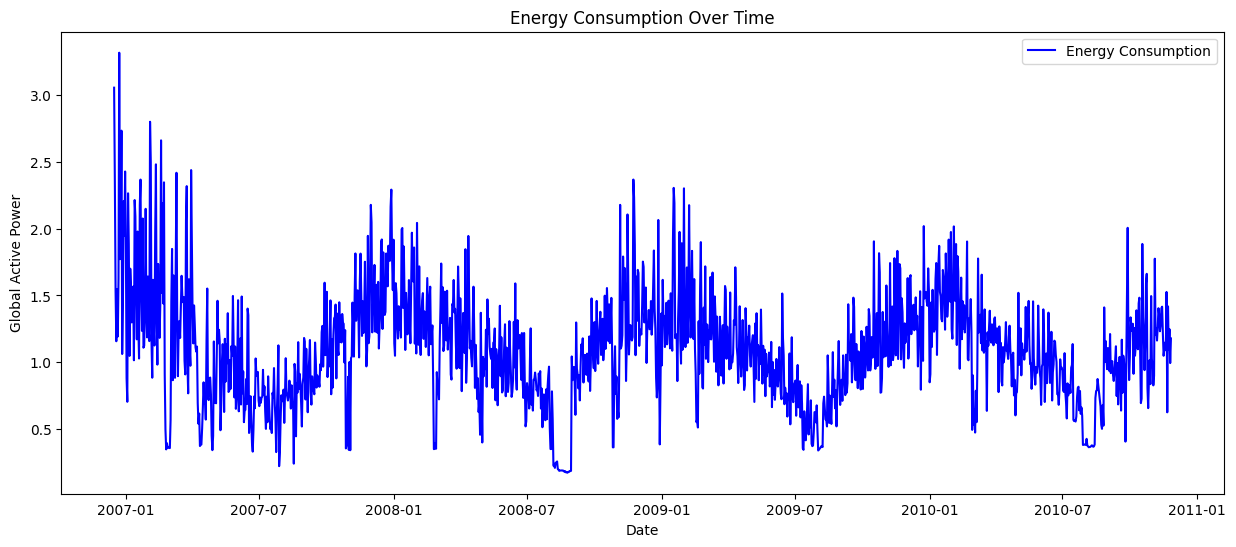

In [23]:
#Time Series Plot Of the Global Active Power
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(energy_resampled.index, energy_resampled['Global_active_power'], label="Energy Consumption", color="blue")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.title("Energy Consumption Over Time")
plt.legend()
plt.show()

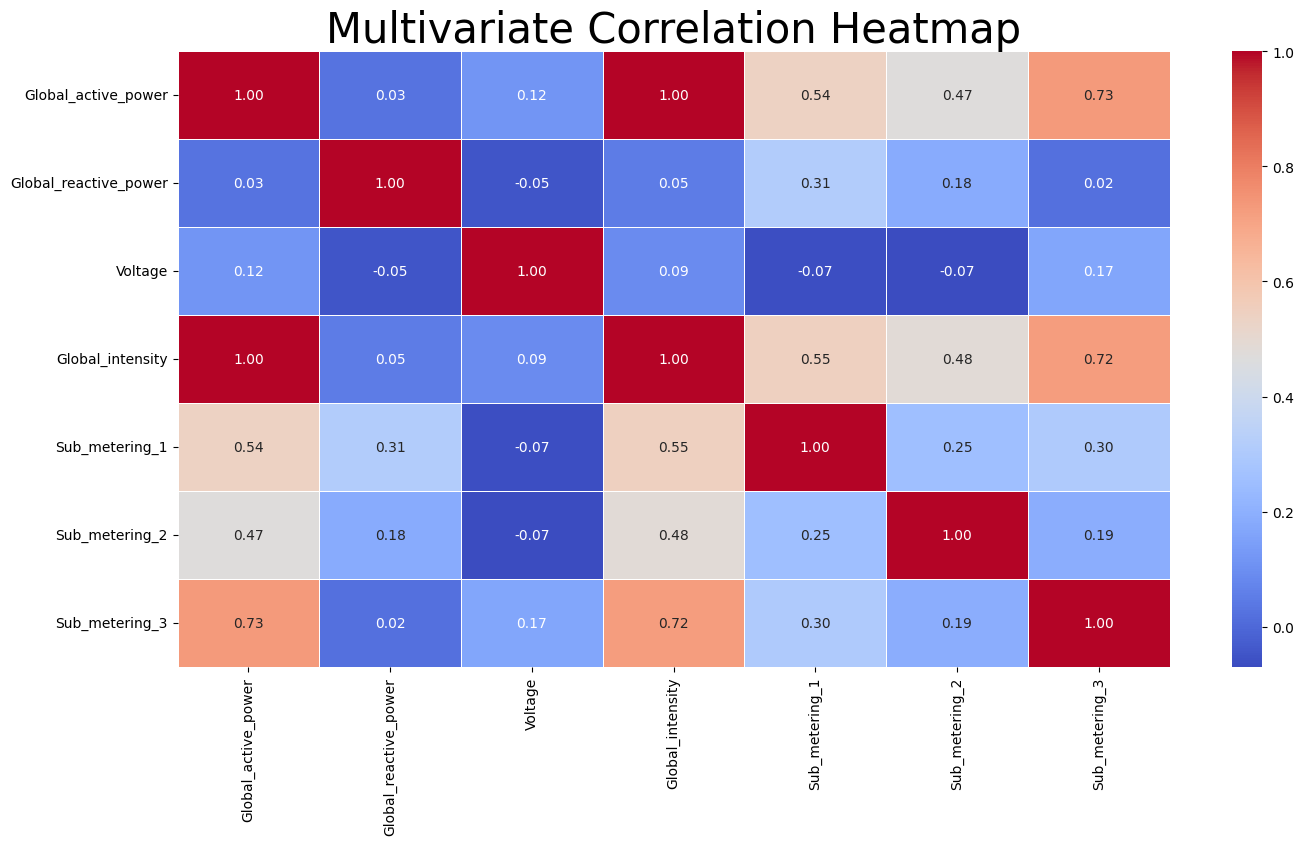

In [ ]:
correlation_matrix = energy_resampled.corr() # Calculating the correlation matrix for the resampled data
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Multivariate Correlation Heatmap", fontsize=30)
plt.show()


Outliers

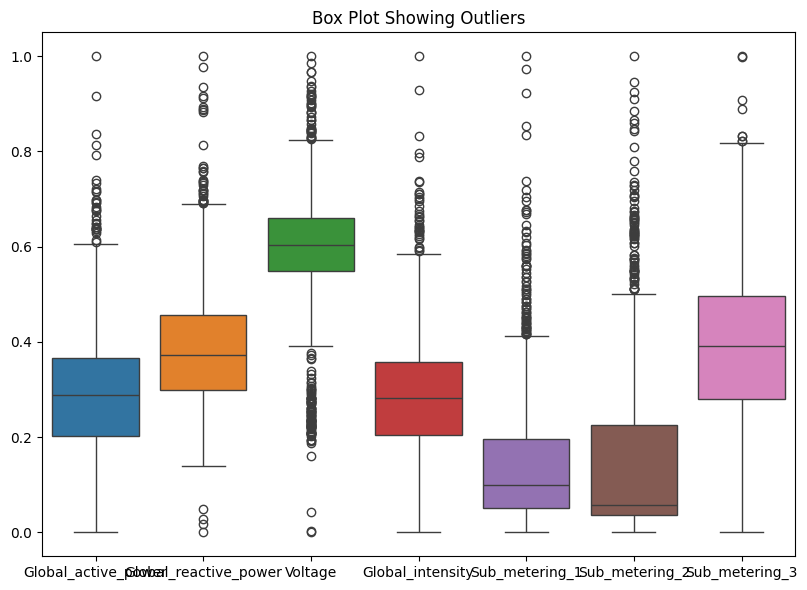

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(energy_resampled), columns=energy_resampled.columns) # Scaling the data to a range of [0, 1] using MinMaxScaler

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

In [ ]:
# Handling Outliers using IQR Method
def remove_outliers(df, columns):
    df_filtered = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 0.8* IQR
        upper_bound = Q3 + 0.8* IQR

        # Filter out rows where the column value is outside the bounds
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']
energy_clean = remove_outliers(energy_resampled, columns)


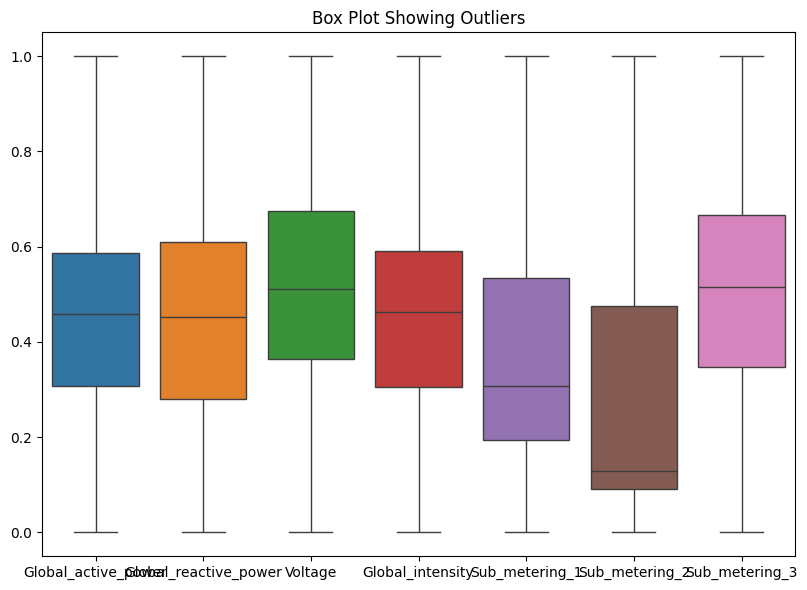

In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(energy_clean), columns=energy_clean.columns)

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

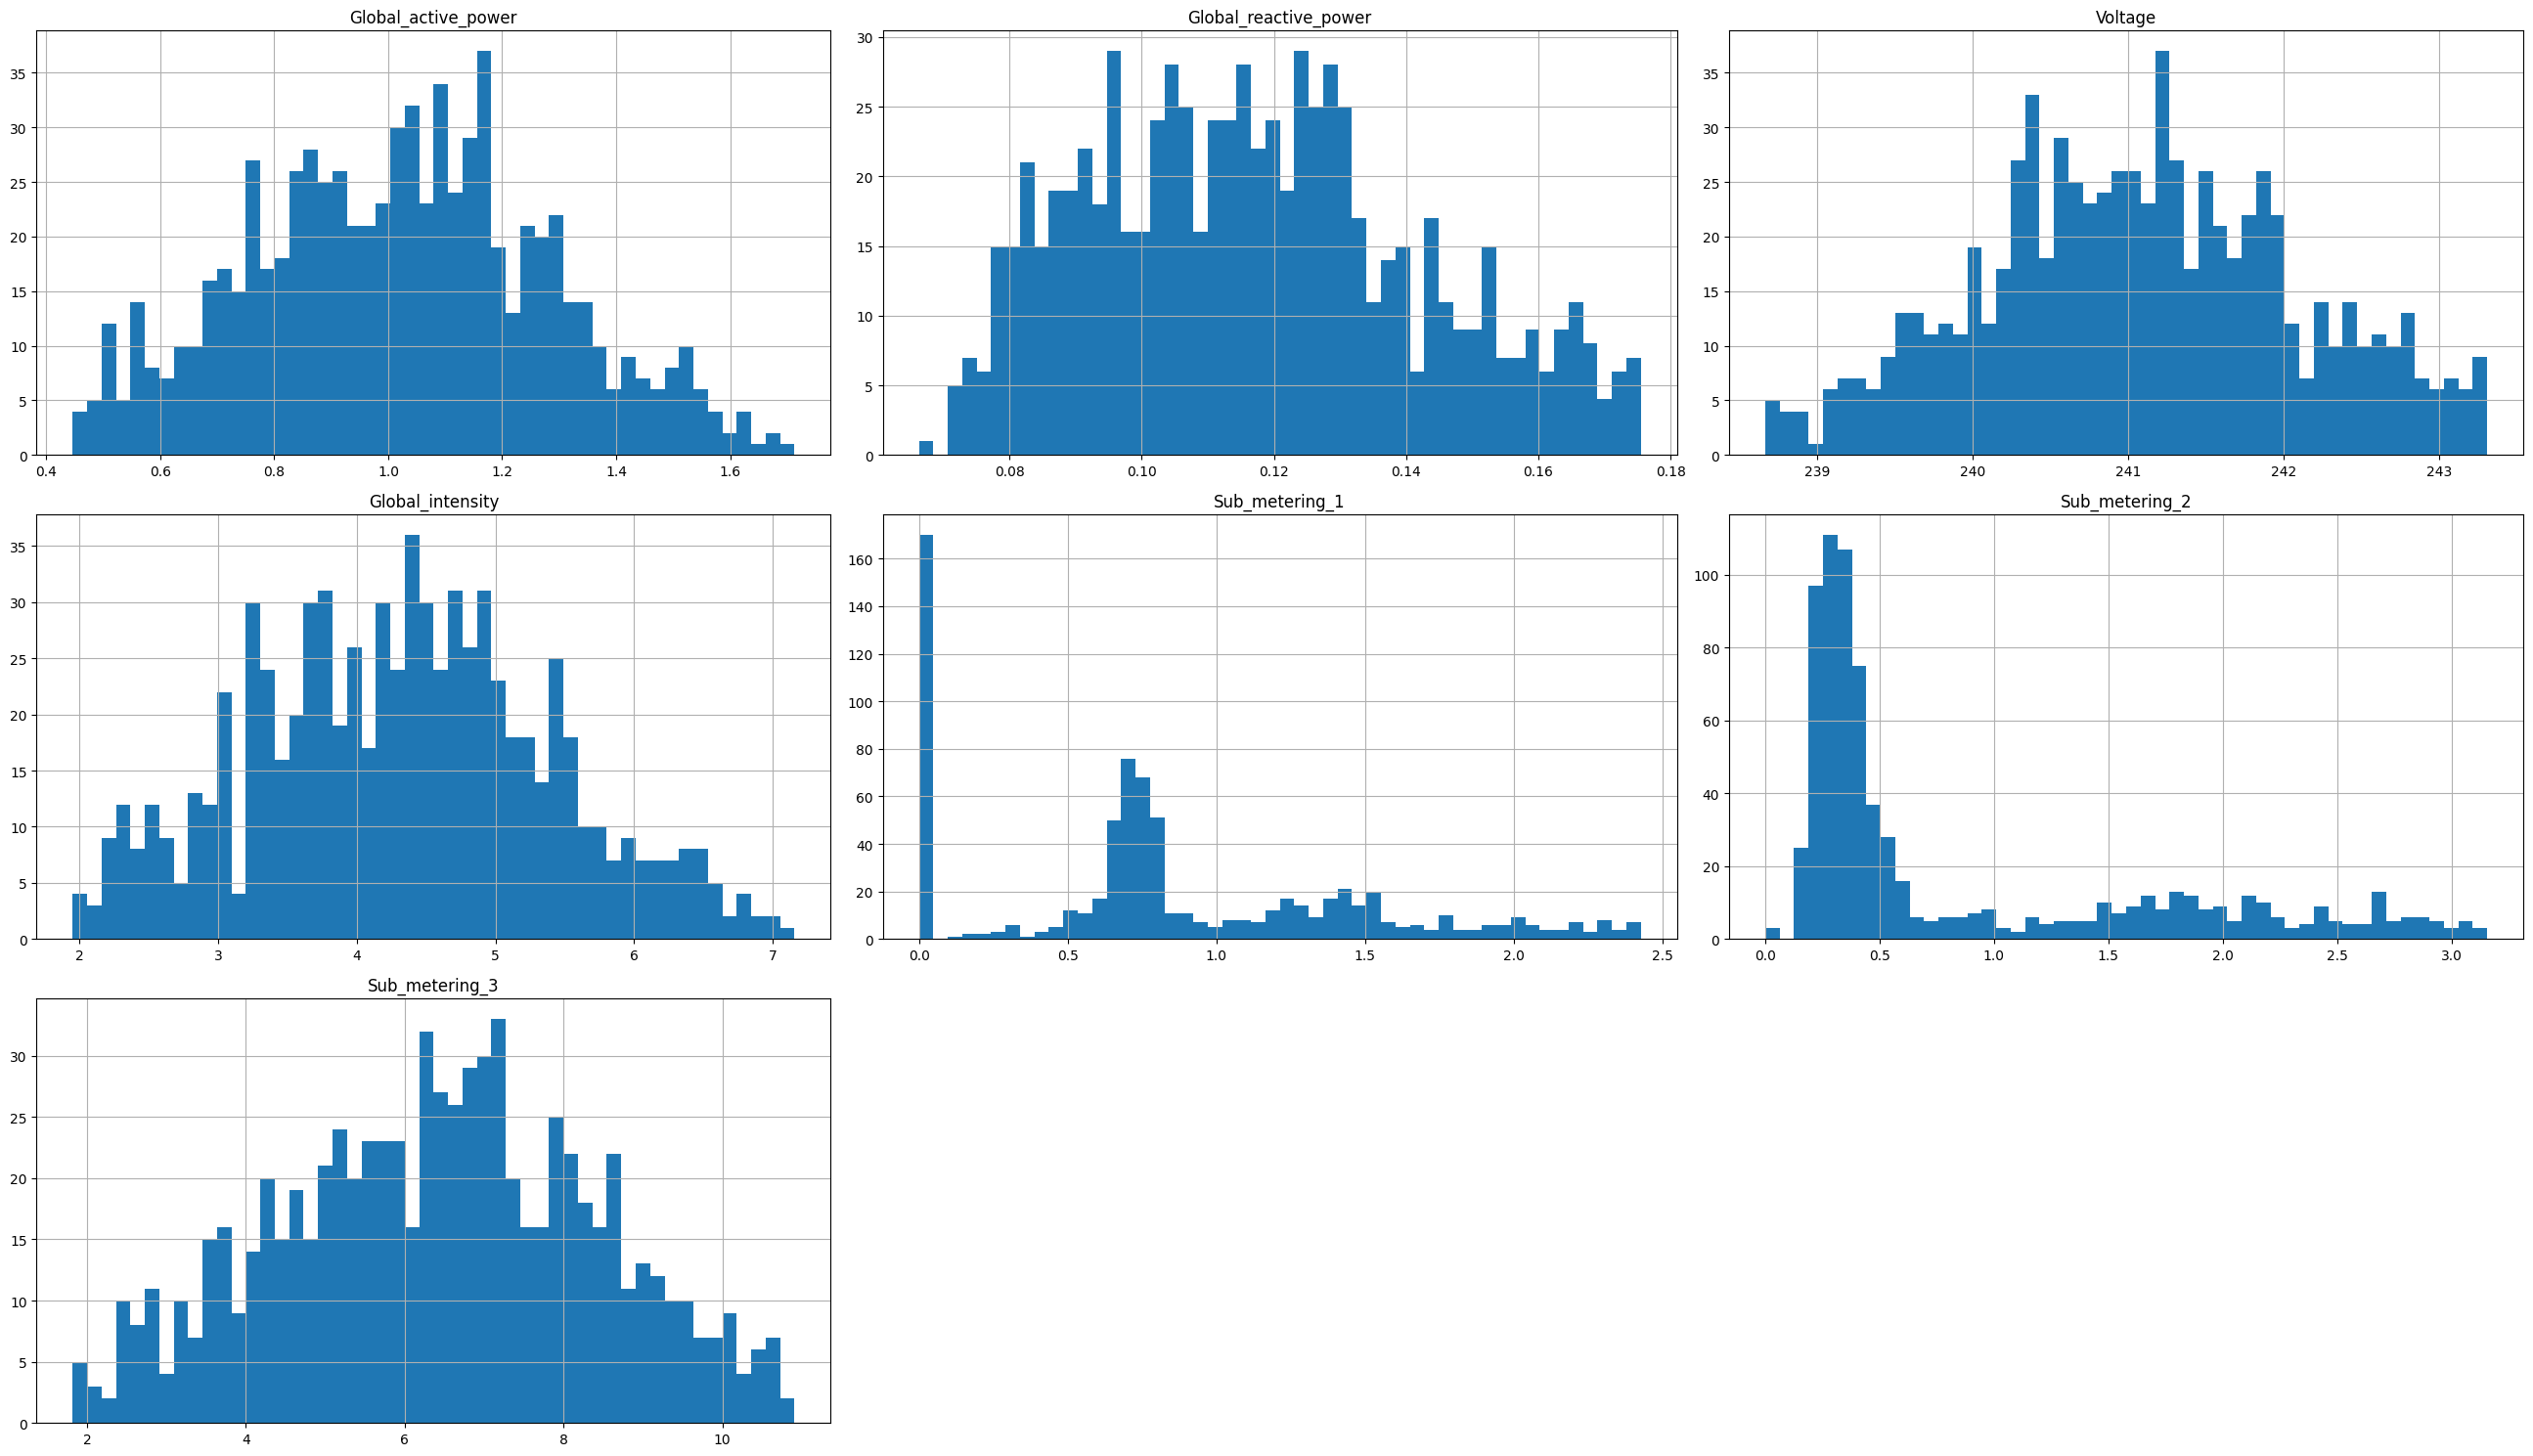

In [30]:
# Plot histograms for each numerical column
import matplotlib.pyplot as plt
energy_clean.hist(bins=50, figsize=(26, 15))
plt.tight_layout()
plt.show()

In [ ]:
#Ensuring the index is in datetime format
energy_clean.index = pd.to_datetime(energy_clean.index)

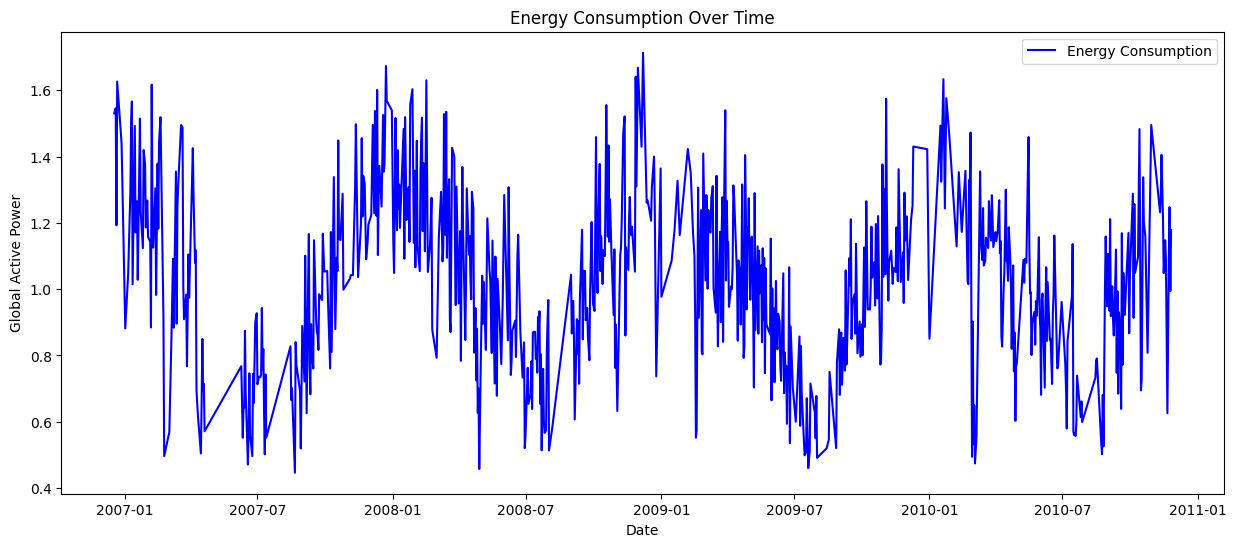

In [ ]:
#Time Series Plot Of the Global Active Power after cleaning
plt.figure(figsize=(15, 6))
plt.plot(energy_clean.index, energy_clean['Global_active_power'], label="Energy Consumption", color="blue")
plt.xlabel("Date")
plt.ylabel("Global Active Power")
plt.title("Energy Consumption Over Time")
plt.legend()
plt.show()

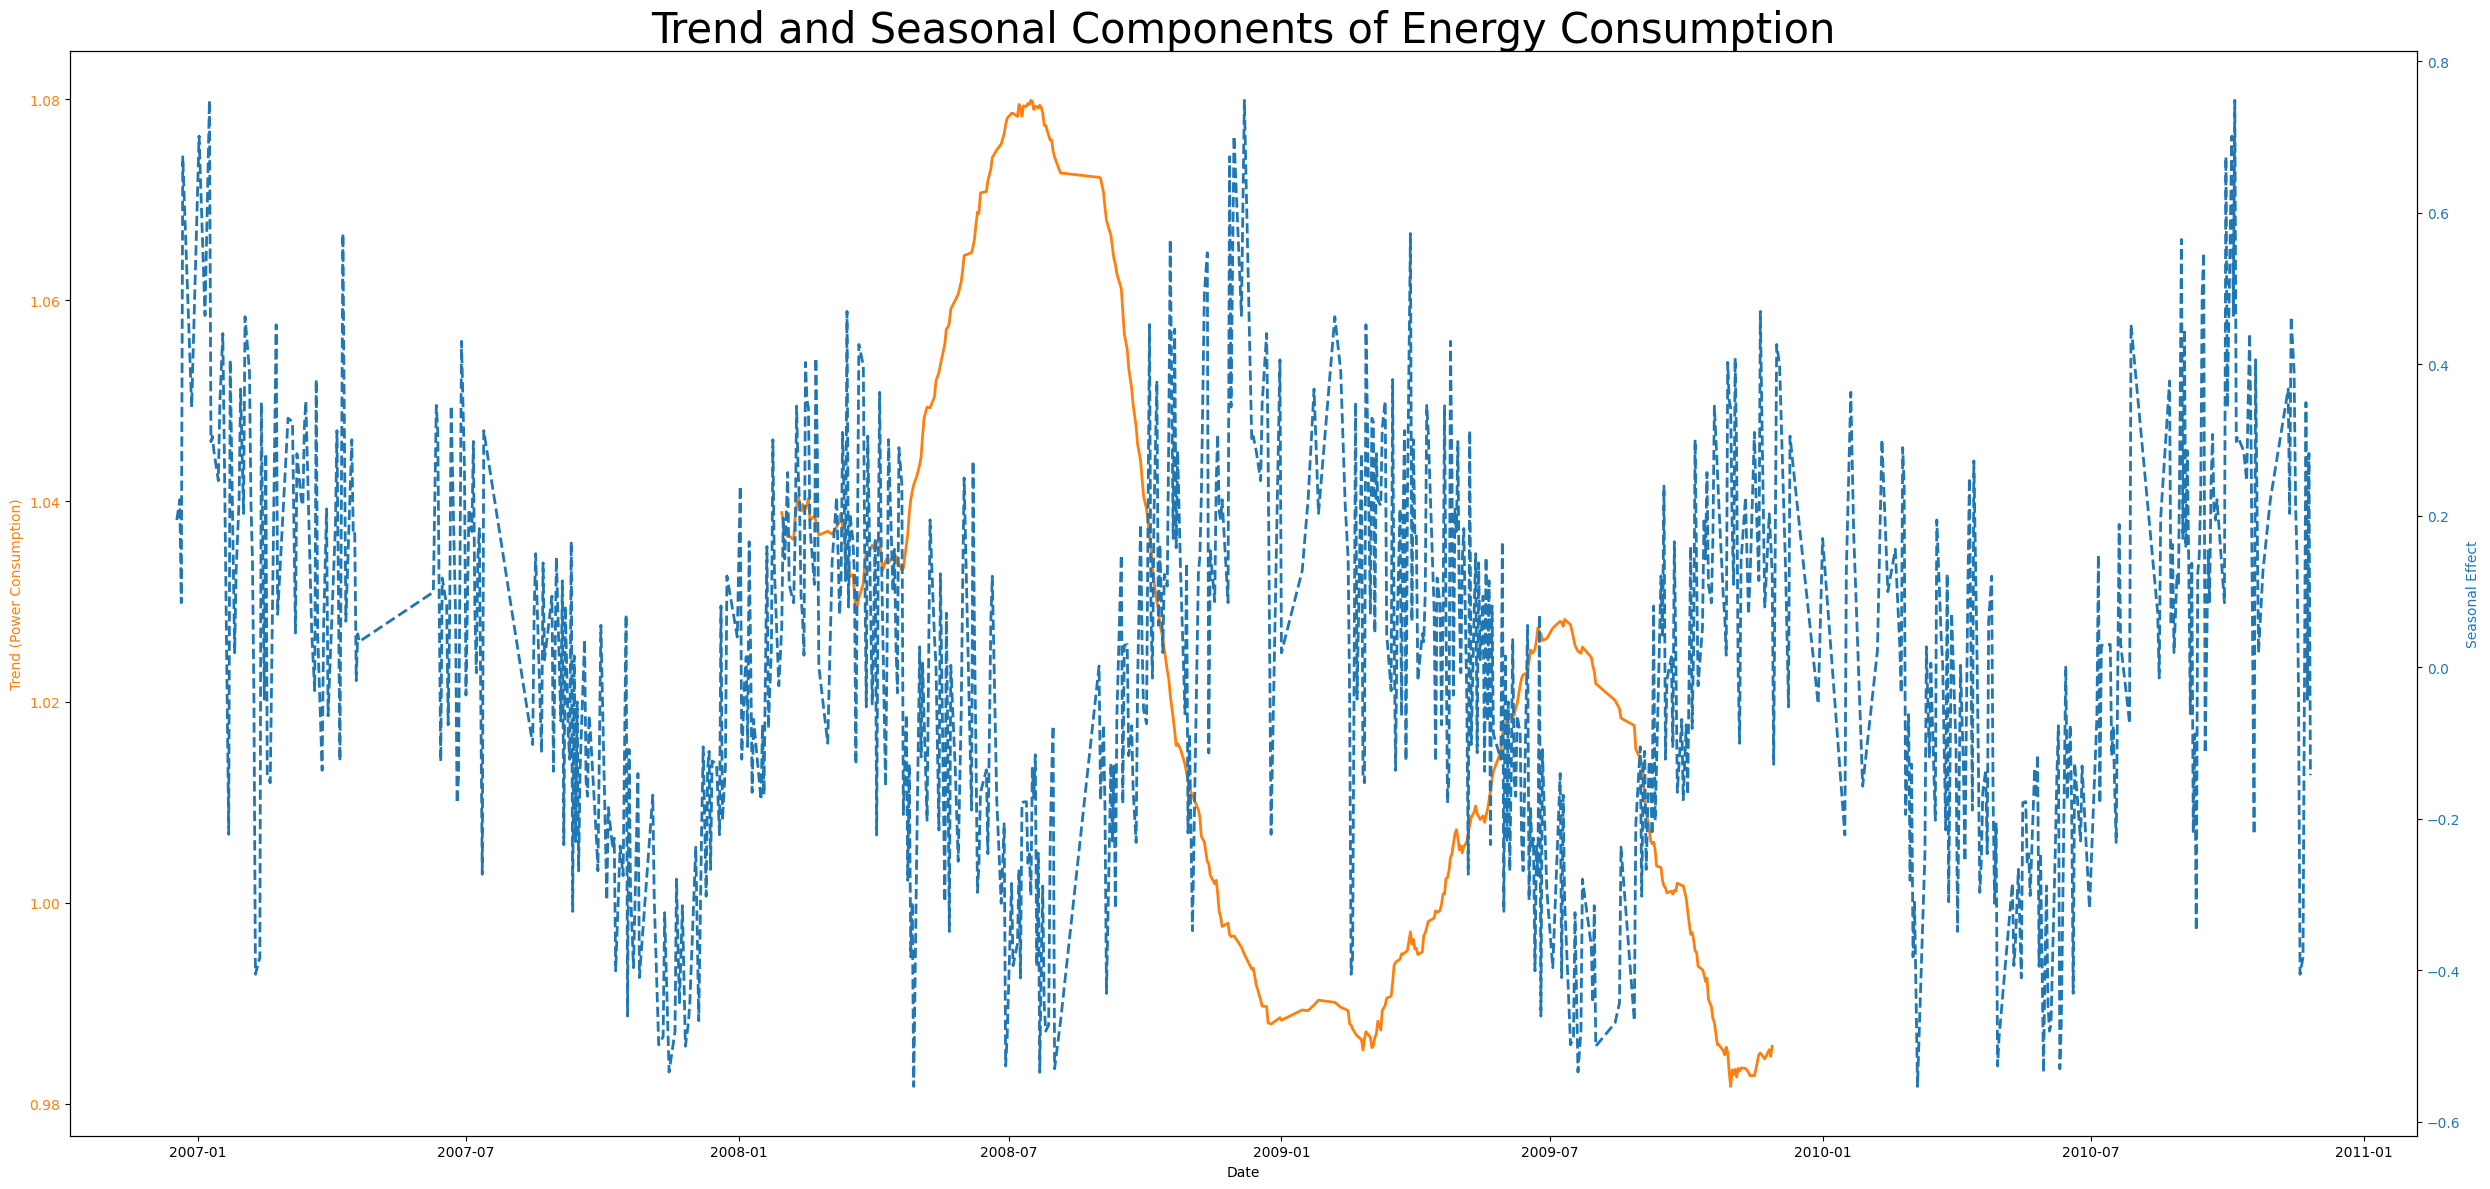

In [ ]:
# Decompose the time series (yearly seasonality for daily data)
decomposition = seasonal_decompose(energy_clean['Global_active_power'], model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(25, 12))

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trend (Power Consumption)', color=color)
ax1.plot(trend, color=color, label='Trend', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for seasonality
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Seasonal Effect', color=color)
ax2.plot(seasonal, color=color, label='Seasonality', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Trend and Seasonal Components of Energy Consumption', fontsize=30)
fig.tight_layout()

plt.show()


In [34]:
#Performing the ADF test to check for stationarity
adf_result = adfuller(energy_clean['Global_active_power'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -3.8214560071587633
p-value: 0.002695264749344958


In [35]:
#Using the KPSS test to check for stationarity

import statsmodels.tsa.stattools as smt
kpss_stat, p_value, lags, crit_values = smt.kpss(energy_clean['Global_active_power'], regression='c', nlags="auto")

# Print results
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-Value: {p_value}')

KPSS Statistic: 0.19178037751174137
P-Value: 0.1


C:\Users\lenovo\AppData\Local\Temp\ipykernel_7884\1724550200.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_values = smt.kpss(energy_clean['Global_active_power'], regression='c', nlags="auto")


+ Since the p-value is less than 0.05 for ADF test and higher than 0.05 for KPSS test, the series is __stationary__

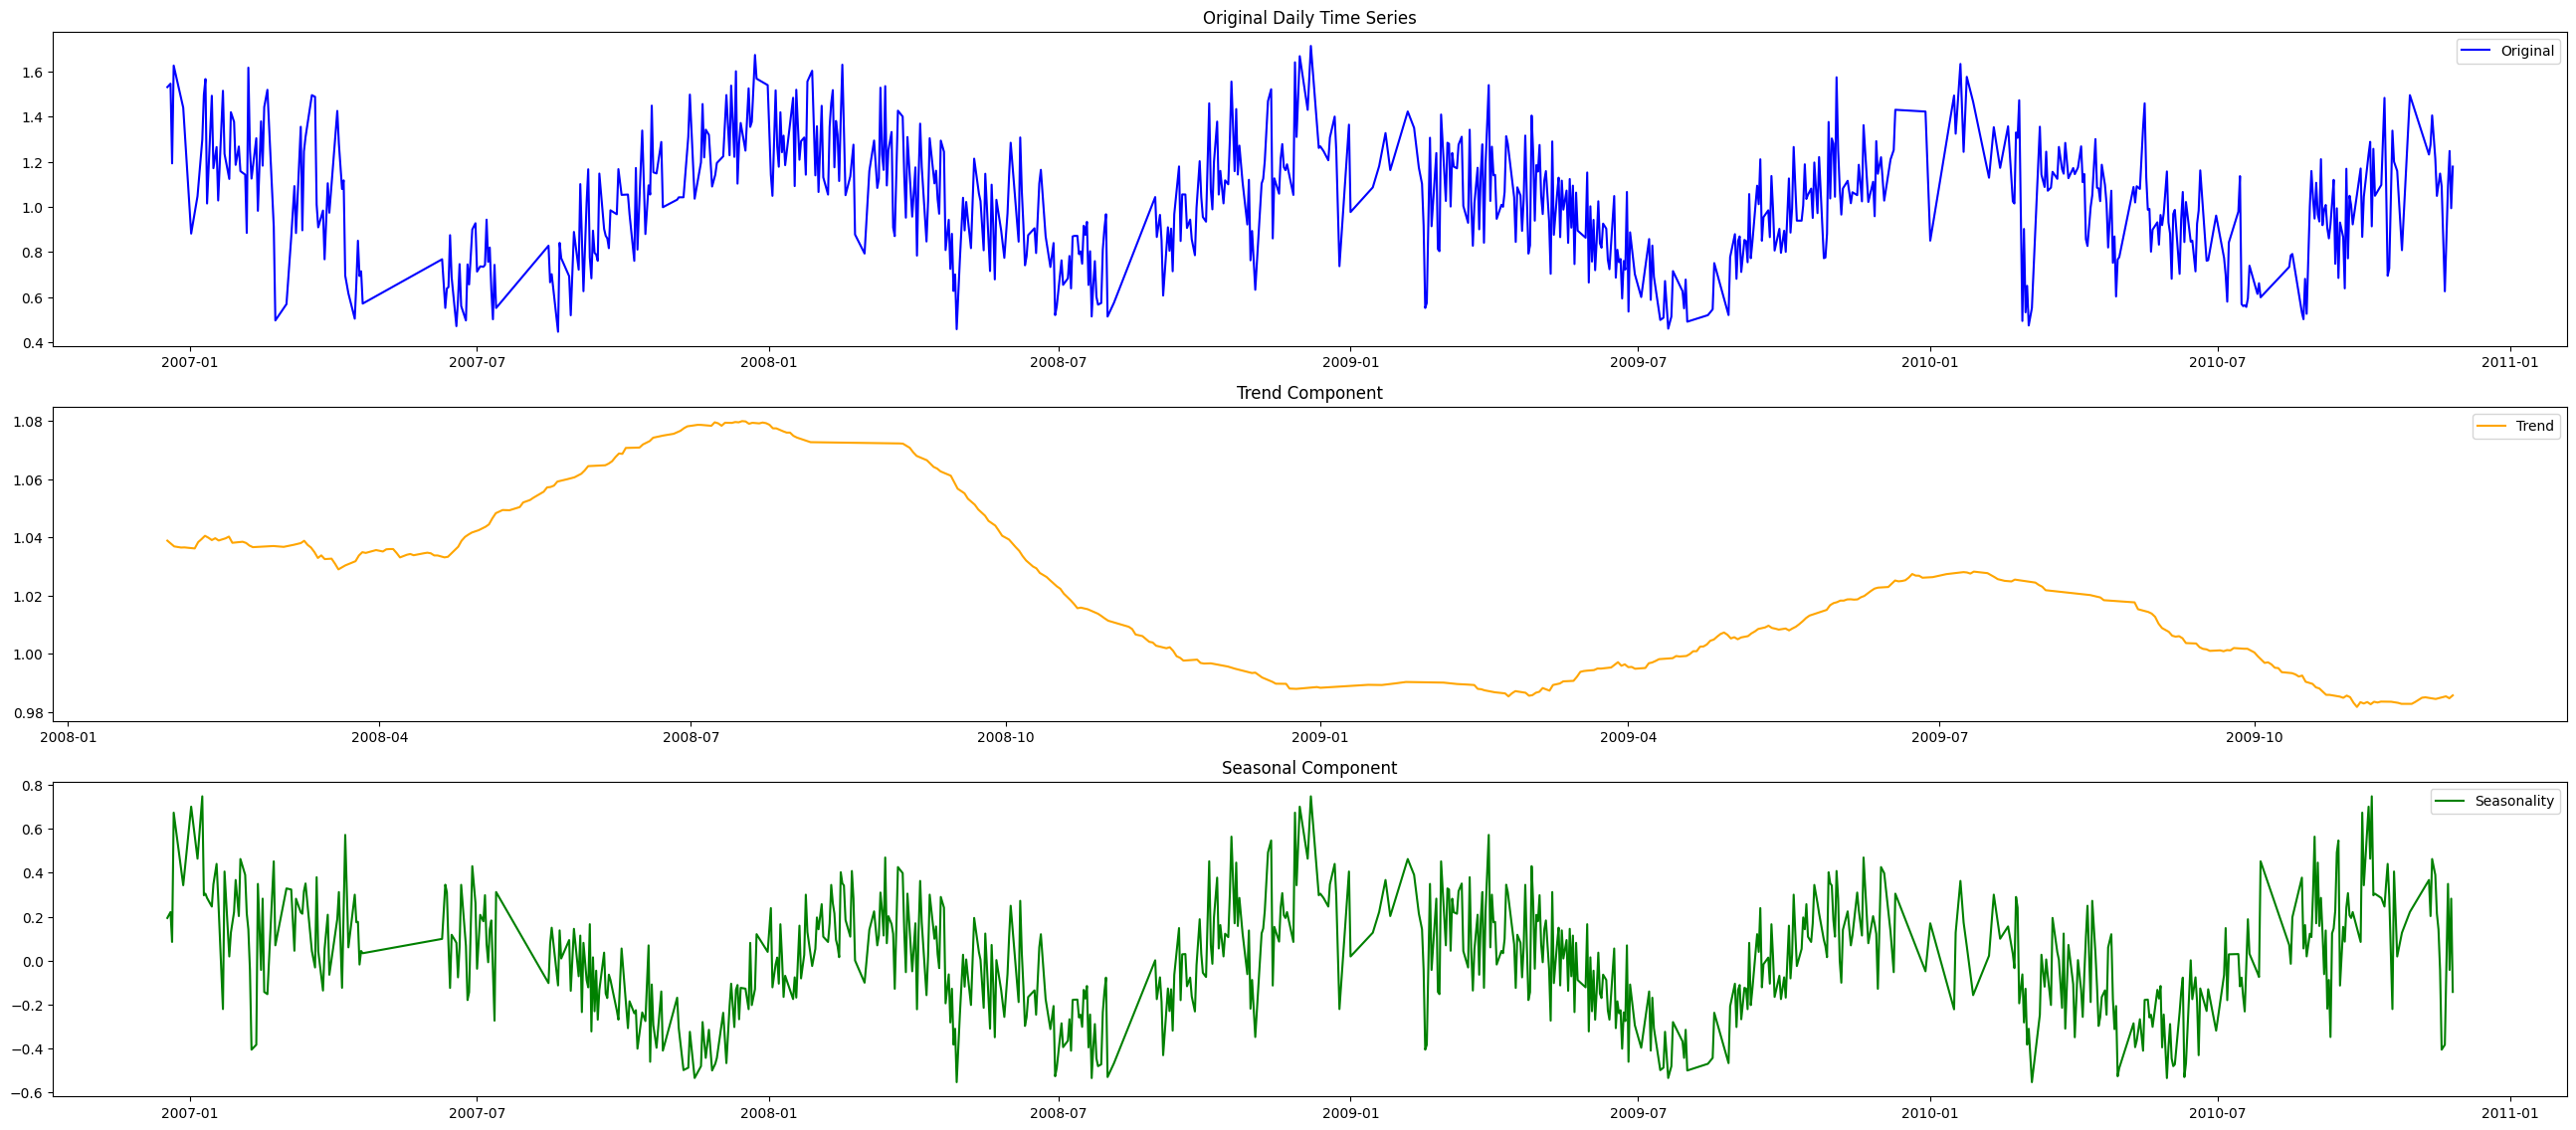

In [37]:
# Plot
plt.figure(figsize=(26, 15))

plt.subplot(4, 1, 1)
plt.plot(energy_clean['Global_active_power'], label='Original', color='blue')
plt.title('Original Daily Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()

Plotting the ACF and PACF

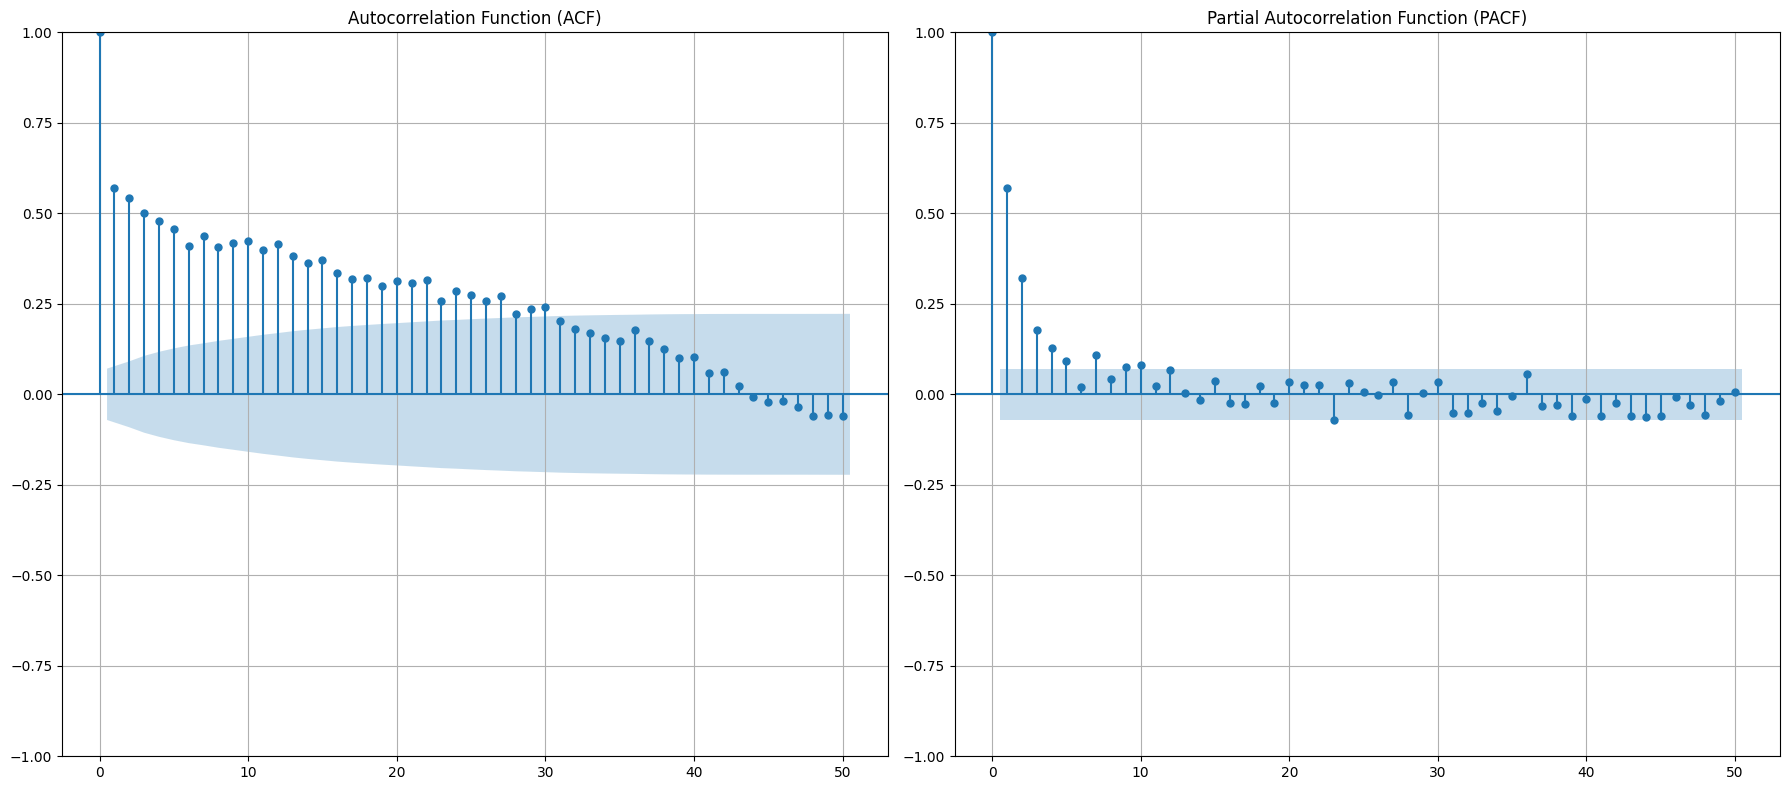

In [36]:
# Set up the plot area
plt.figure(figsize=(18, 8))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(energy_clean['Global_active_power'], lags=50, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.grid(True)

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(energy_clean['Global_active_power'], lags=50, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)', method='ywm')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Engineering time-based features (lagged values and rolling mean)
for window in range(15, 51):
    energy_clean[f'Rolling_Mean_{window}'] = energy_clean['Global_active_power'].rolling(window=window).mean()

# Choosing lags that capture different temporal patterns
lag_list = [1, 7, 14, 21, 30, 60]

for lag in lag_list:
    energy_clean[f'Lag_{lag}'] = energy_clean['Global_active_power'].shift(lag)

energy_clean = energy_clean.dropna()
energy_clean


Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2007-04-11             0.616307               0.133643  241.154826   
2007-04-15             0.504281               0.119128  240.236688   
2007-04-16             0.661382               0.129218  240.657139   
2007-04-17             0.849815               0.151635  240.195667   
2007-04-18             0.693226               0.114739  240.146778   
...                         ...                    ...         ...   
2010-11-21             0.625632               0.083072  241.180194   
2010-11-23             1.095511               0.095451  240.575528   
2010-11-24             1.247394               0.091986  240.030965   
2010-11-25             0.993864               0.080644  241.536257   
2010-11-26             1.178230               0.095666  240.291029   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Datetime                                                                       
2007-04-11          2.618750        0.000000        0.772222        4.459028   
2007-04-15          2.186528        0.000000        0.712500        2.009028   
2007-04-16          2.872500        0.661111        0.906250        3.233333   
2007-04-17          3.690833        1.063889        0.270139        4.304861   
2007-04-18          2.995417        1.096528        0.246528        2.381944   
...                      ...             ...             ...             ...   
2010-11-21          2.637917        0.000000        0.351389        3.318056   
2010-11-23          4.674444        1.299306        0.318056        5.285417   
2010-11-24          5.249583        0.761111        1.977778        8.488889   
2010-11-25          4.169444        0.747222        0.295833        3.522222   
2010-11-26          4.956295        0.855107        0.304830        7.908947   

            Rolling_Mean_15  Rolling_Mean_16  Rolling_Mean_17  ...  \
Datetime                                                       ...   
2007-04-11         1.032272         1.041629         1.057350  ...   
2007-04-15         0.966237         0.999272         1.010020  ...   
2007-04-16         0.911158         0.947183         0.979396  ...   
2007-04-17         0.900452         0.907324         0.941456  ...   
2007-04-18         0.886065         0.887501         0.894730  ...   
...                     ...              ...              ...  ...   
2010-11-21         1.124186         1.097328         1.097988  ...   
2010-11-23         1.148730         1.122394         1.097221  ...   
2010-11-24         1.142724         1.154897         1.129747  ...   
2010-11-25         1.128984         1.133420         1.145424  ...   
2010-11-26         1.130269         1.132061         1.136056  ...   

            Rolling_Mean_47  Rolling_Mean_48  Rolling_Mean_49  \
Datetime                                                        
2007-04-11         1.124782         1.127702         1.128588   
2007-04-15         1.113638         1.111855         1.114979   
2007-04-16         1.095492         1.104216         1.102662   
2007-04-17         1.087308         1.090374         1.099024   
2007-04-18         1.078151         1.079098         1.082269   
...                     ...              ...              ...   
2010-11-21         1.036288         1.039927         1.037786   
2010-11-23         1.040048         1.037521         1.041062   
2010-11-24         1.045565         1.044368         1.041805   
2010-11-25         1.045259         1.044488         1.043337   
2010-11-26         1.051064         1.048029         1.047217   

            Rolling_Mean_50     Lag_1     Lag_7    Lag_14    Lag_21    Lag_30  \
Datetime                                                                        
2007-04-11         1.135859  0.539836  0.973885  1.494804  1.091758  1.378713   
2007-04-15         1.116102  0.616307  1.424908  1.487564  0

In [ ]:
#Splitting into training and testing sets
train_size = int(len(energy_clean) * 0.8)

# Split the data
train_data = energy_clean[:train_size]
test_data = energy_clean[train_size:]

# Display the shapes of the training and testing sets
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")


Training data shape: (583, 49)
Testing data shape: (146, 49)


## End Of Section 1:

## Statistical Models
>### Moving Average

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6068\3115208563.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6068\3115208563.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6068\3115208563.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_6068\3115208563.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\len

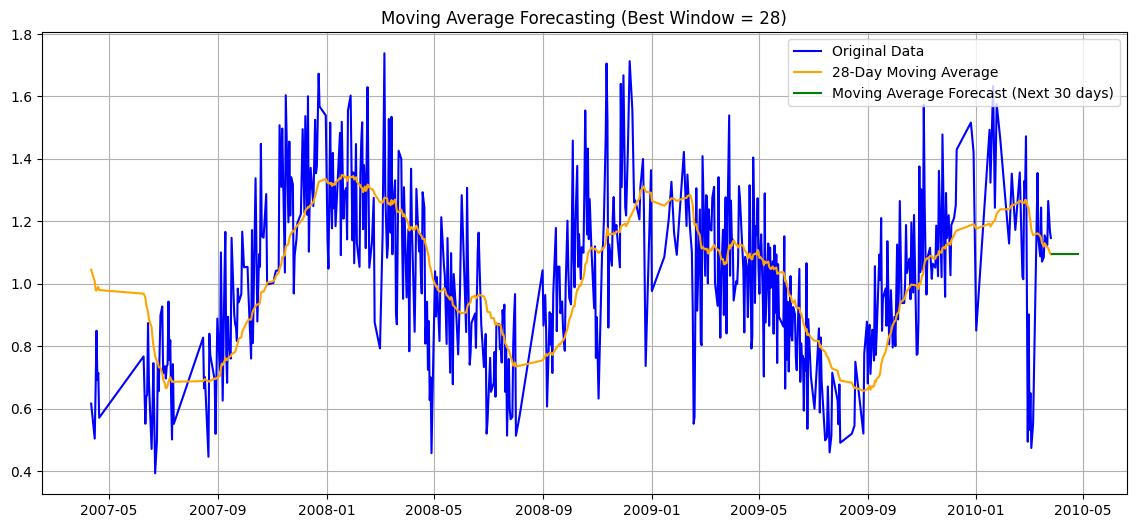

Best Window Size: 28
RMSE: 0.1374
MAE: 0.1048
MAPE: 10.48%


In [ ]:
best_rmse = float('inf') # Initialize best RMSE to infinity
best_window = None # Initialize best window to None
best_forecast = None # Initialize best forecast to None
best_metrics = {} # Initialize best metrics to an empty dictionary

# Loop through existing rolling mean features
for window in range(15, 51):
    rolling_col = f'Rolling_Mean_{window}'
    if rolling_col not in train_data.columns:
        continue  # skip if the column doesn't exist

    try:
        last_mean = train_data[rolling_col].dropna().iloc[-1]
    except IndexError:
        continue  # skip if not enough data for the current window

    forecast = pd.Series(
        [last_mean] * 30,
        index=pd.date_range(start=train_data.index[-1] + pd.Timedelta(days=1), periods=30)
    )

    actual = test_data['Global_active_power'].reindex(forecast.index)
    actual.fillna(method='ffill', inplace=True)

    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100

    if rmse < best_rmse:
        best_rmse = rmse
        best_window = window
        best_forecast = forecast
        best_metrics = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Plot using the best window
best_col = f'Rolling_Mean_{best_window}'

plt.figure(figsize=(14, 6))
plt.plot(train_data['Global_active_power'], label='Original Data', color='blue')
plt.plot(train_data[best_col], label=f'{best_window}-Day Moving Average', color='orange')
plt.plot(best_forecast, label='Moving Average Forecast (Next 30 days)', color='green')
plt.title(f'Moving Average Forecasting (Best Window = {best_window})')
plt.legend()
plt.grid(True)
plt.show()

# Print best metrics
print(f'Best Window Size: {best_window}')
print(f"RMSE: {best_metrics['RMSE']:.4f}")
print(f"MAE: {best_metrics['MAE']:.4f}")
print(f"MAPE: {best_metrics['MAPE']:.2f}%")


>### Exponential Smoothing (Holt-Winters)

c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\L

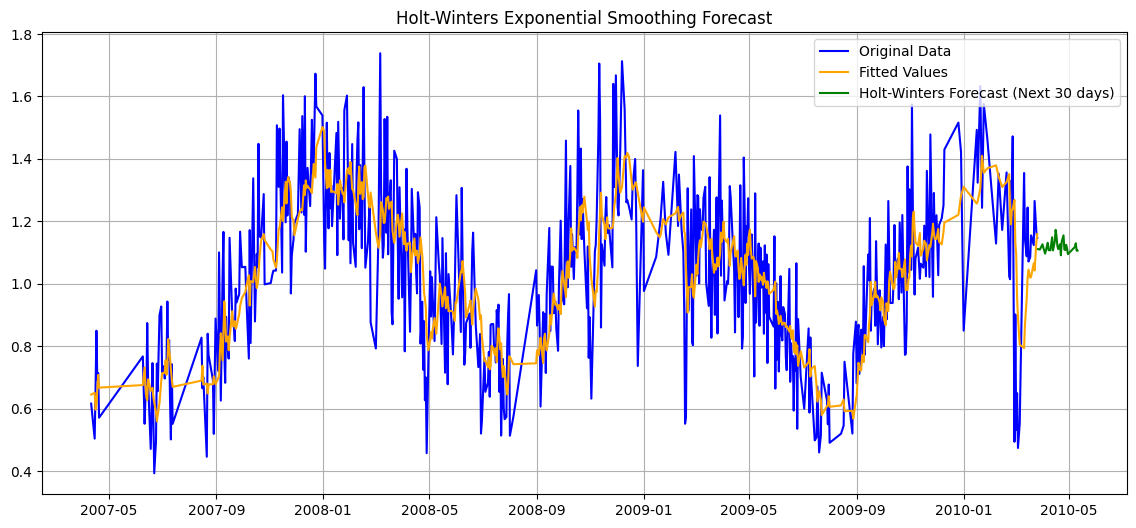

Best Params → Trend: mul, Seasonal: add, Period: 21
RMSE: 0.1908
MAE: 0.1424
MAPE: 16.51%


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product

# Ensure datetime index
train_data.index = pd.to_datetime(train_data.index)
test_data.index = pd.to_datetime(test_data.index)

# Parameter grid
trend_options = ['add', 'mul'] 
seasonal_options = ['add', 'mul'] 
seasonal_periods_options = [7, 14, 21, 30, 60]

best_score = float('inf')
best_params = None
best_model = None

# Grid search
for trend, seasonal, period in product(trend_options, seasonal_options, seasonal_periods_options):
    try:
        model = ExponentialSmoothing(
            train_data['Global_active_power'],
            trend=trend,
            seasonal=seasonal,
            seasonal_periods=period
        )
        fit = model.fit()
        forecast = fit.forecast(30)

        # Get actual data to compare
        actual = test_data['Global_active_power'].iloc[:len(forecast)]

        # Align forecast index to actual
        forecast.index = actual.index

        # Evaluate
        score = np.sqrt(mean_squared_error(actual, forecast))

        if score < best_score:
            best_score = score
            best_params = (trend, seasonal, period)
            best_model = fit
            best_forecast = forecast

    except Exception as e:
        continue  # skip failing combinations

# Use best model
forecast_hw = best_forecast
hw_fit = best_model
actual_30 = test_data['Global_active_power'].iloc[:len(forecast_hw)]

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(train_data['Global_active_power'], label='Original Data', color='blue')
plt.plot(hw_fit.fittedvalues, label='Fitted Values', color='orange')
plt.plot(forecast_hw, label='Holt-Winters Forecast (Next 30 days)', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(actual_30, forecast_hw))
mae = mean_absolute_error(actual_30, forecast_hw)
mape = np.mean(np.abs((actual_30 - forecast_hw) / actual_30)) * 100

print(f'Best Params → Trend: {best_params[0]}, Seasonal: {best_params[1]}, Period: {best_params[2]}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')


>### ARIMA Model

Best ARIMA(p,d,q) by AIC: (1, 0, 1) (AIC=-248.76)
Best ARIMA(p,d,q) by BIC: (1, 0, 1) (BIC=-231.28)
RMSE: 0.1743
MAE: 0.1214
MAPE: 14.24%


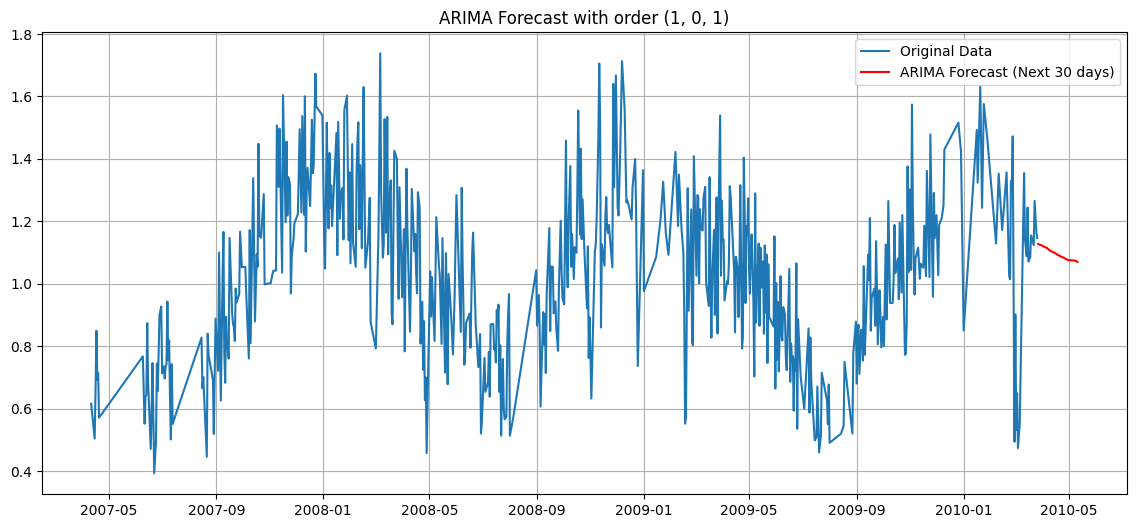

In [ ]:
import itertools
p = range(1, 4) # AR terms
q = range(0, 3) # MA terms
d = [0]  # assuming data is already stationary

# Generate all combinations
pdq = list(itertools.product(p, d, q))

# Suppress warnings
warnings.filterwarnings("ignore")

best_aic = float('inf') # Initialize best AIC to infinity
best_bic = float('inf') # Initialize best BIC to infinity
best_order_aic = None # Initialize best order for AIC to None
best_order_bic = None # Initialize best order for BIC to None
best_model = None # Initialize best model to None

for order in pdq:
    try:
        model = sm.tsa.ARIMA(train_data['Global_active_power'], order=order)
        results = model.fit()

        if results.aic < best_aic:
            best_aic = results.aic
            best_order_aic = order
            best_model = results

        if results.bic < best_bic:
            best_bic = results.bic
            best_order_bic = order
    except:
        continue

print(f'Best ARIMA(p,d,q) by AIC: {best_order_aic} (AIC={best_aic:.2f})')
print(f'Best ARIMA(p,d,q) by BIC: {best_order_bic} (BIC={best_bic:.2f})')

# Forecasting next 30 steps
forecast_ar = best_model.forecast(steps=30)

# Align forecast with test data
actual = test_data['Global_active_power'].iloc[:len(forecast_ar)]
forecast_ar.index = actual.index

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(actual, forecast_ar))
mae = mean_absolute_error(actual, forecast_ar)
mape = np.mean(np.abs((actual - forecast_ar) / actual)) * 100

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(train_data['Global_active_power'], label='Original Data')
plt.plot(forecast_ar.index, forecast_ar, label='ARIMA Forecast (Next 30 days)', color='red')
plt.title(f'ARIMA Forecast with order {best_order_aic}')
plt.legend()
plt.grid(True)
plt.show()


## End of Section 2:

>### Adding date-based features

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import holidays

# --- 1. Feature Engineering ---
energy_ml = energy_clean.copy()
energy_ml['dayofweek'] = energy_ml.index.dayofweek
energy_ml['month'] = energy_ml.index.month
energy_ml['day'] = energy_ml.index.day
energy_ml['is_weekend'] = energy_ml['dayofweek'] >= 5
energy_ml['is_holiday'] = energy_ml.index.isin(holidays.CountryHoliday('US', years=energy_ml.index.year.unique()))
energy_ml.head(10)

Global_active_power  Global_reactive_power     Voltage  \
Datetime                                                             
2007-04-11             0.616307               0.133643  241.154826   
2007-04-15             0.504281               0.119128  240.236688   
2007-04-16             0.661382               0.129218  240.657139   
2007-04-17             0.849815               0.151635  240.195667   
2007-04-18             0.693226               0.114739  240.146778   
2007-04-19             0.714346               0.103931  240.429840   
2007-04-20             0.571236               0.101143  240.132896   
2007-06-09             0.767542               0.161939  240.697375   
2007-06-11             0.551843               0.135163  240.856750   
2007-06-12             0.638032               0.150289  240.224896   

            Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  \
Datetime                                                                       
2007-04-11          2.618750        0.000000        0.772222        4.459028   
2007-04-15          2.186528        0.000000        0.712500        2.009028   
2007-04-16          2.872500        0.661111        0.906250        3.233333   
2007-04-17          3.690833        1.063889        0.270139        4.304861   
2007-04-18          2.995417        1.096528        0.246528        2.381944   
2007-04-19          3.055833        0.509028        1.114583        3.991667   
2007-04-20          2.494861        0.742361        0.250000        2.429861   
2007-06-09          3.302431        0.591667        0.430556        4.805556   
2007-06-11          2.417917        0.000000        0.338194        3.700000   
2007-06-12          2.858611        1.306944        0.329861        2.706944   

            Rolling_Mean_15  Rolling_Mean_16  Rolling_Mean_17  ...     Lag_7  \
Datetime                                                       ...             
2007-04-11         1.032272         1.041629         1.057350  ...  0.973885   
2007-04-15         0.966237         0.999272         1.010020  ...  1.424908   
2007-04-16         0.911158         0.947183         0.979396  ...  1.280610   
2007-04-17         0.900452         0.907324         0.941456  ...  1.079114   
2007-04-18         0.886065         0.887501         0.894730  ...  1.117233   
2007-04-19         0.868129         0.875333         0.877315  ...  0.695083   
2007-04-20         0.855047         0.849573         0.857445  ...  0.539836   
2007-06-09         0.832587         0.849578         0.844748  ...  0.616307   
2007-06-11         0.804451         0.815040         0.832064  ...  0.504281   
2007-06-12         0.751992         0.794050         0.804628  ...  0.661382   

              Lag_14    Lag_21    Lag_30    Lag_60  dayofweek  month  day  \
Datetime                                                                    
2007-04-11  1.494804  1.091758  1.378713  1.530435          2      4   11   
2007-04-15  1.487564  0.883758  1.182311  1.545658          6      4   15   
2007-04-16  1.010401  1.354631  1.442300  1.192440          0      4   16   
2007-04-17  0.909033  0.895933  1.518482  1.625929          1      4   17   
2007-04-18  0.983390  1.245392  1.439496  1.439332          2      4   18   
2007-04-19  0.767458  1.308899  0.912139  0.881414          3      4   19   
2007-04-20  1.104449  1.181982  0.496474  1.047485          4      4   20   
2007-06-09  0.973885  1.494804  0.568835  1.297954          5      6    9   
2007-06-11  1.424908  1.487564  0.865625  1.496389          0      6   11   
2007-06-12  1.280610  1.010401  1.091758  1.566107          1      6   12   

            is_weekend  is_holiday  
Datetime                            
2007-04-11       False       False  
2007-04-15        True       False  
2007-04-16       False       False  
2007-04-17       False       False  
2007-04-18       False       False  
2007-04-19       False       False  
2007-04-20       False      

In [ ]:
energy_ml.shape # Displaying the shape of the dataset after feature engineering

(729, 54)

In [ ]:
energy_ml.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Rolling_Mean_15          0
Rolling_Mean_16          0
Rolling_Mean_17          0
Rolling_Mean_18          0
Rolling_Mean_19          0
Rolling_Mean_20          0
Rolling_Mean_21          0
Rolling_Mean_22          0
Rolling_Mean_23          0
Rolling_Mean_24          0
Rolling_Mean_25          0
Rolling_Mean_26          0
Rolling_Mean_27          0
Rolling_Mean_28          0
Rolling_Mean_29          0
Rolling_Mean_30          0
Rolling_Mean_31          0
Rolling_Mean_32          0
Rolling_Mean_33          0
Rolling_Mean_34          0
Rolling_Mean_35          0
Rolling_Mean_36          0
Rolling_Mean_37          0
Rolling_Mean_38          0
Rolling_Mean_39          0
Rolling_Mean_40          0
Rolling_Mean_41          0
Rolling_Mean_42          0
Rolling_Mean_43          0
Rolling_Mean_44          0
R

In [ ]:
energy_ml.columns # Displaying the columns of the dataset after feature engineering

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Rolling_Mean_15', 'Rolling_Mean_16',
       'Rolling_Mean_17', 'Rolling_Mean_18', 'Rolling_Mean_19',
       'Rolling_Mean_20', 'Rolling_Mean_21', 'Rolling_Mean_22',
       'Rolling_Mean_23', 'Rolling_Mean_24', 'Rolling_Mean_25',
       'Rolling_Mean_26', 'Rolling_Mean_27', 'Rolling_Mean_28',
       'Rolling_Mean_29', 'Rolling_Mean_30', 'Rolling_Mean_31',
       'Rolling_Mean_32', 'Rolling_Mean_33', 'Rolling_Mean_34',
       'Rolling_Mean_35', 'Rolling_Mean_36', 'Rolling_Mean_37',
       'Rolling_Mean_38', 'Rolling_Mean_39', 'Rolling_Mean_40',
       'Rolling_Mean_41', 'Rolling_Mean_42', 'Rolling_Mean_43',
       'Rolling_Mean_44', 'Rolling_Mean_45', 'Rolling_Mean_46',
       'Rolling_Mean_47', 'Rolling_Mean_48', 'Rolling_Mean_49',
       'Rolling_Mean_50', 'Lag_1', 'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30',
       'Lag_60', 'dayofweek', 

>### Machine Learning Models (Random Forest)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest RMSE: 0.0107
Random Forest MAE: 0.0086
Random Forest MAPE: 0.96%


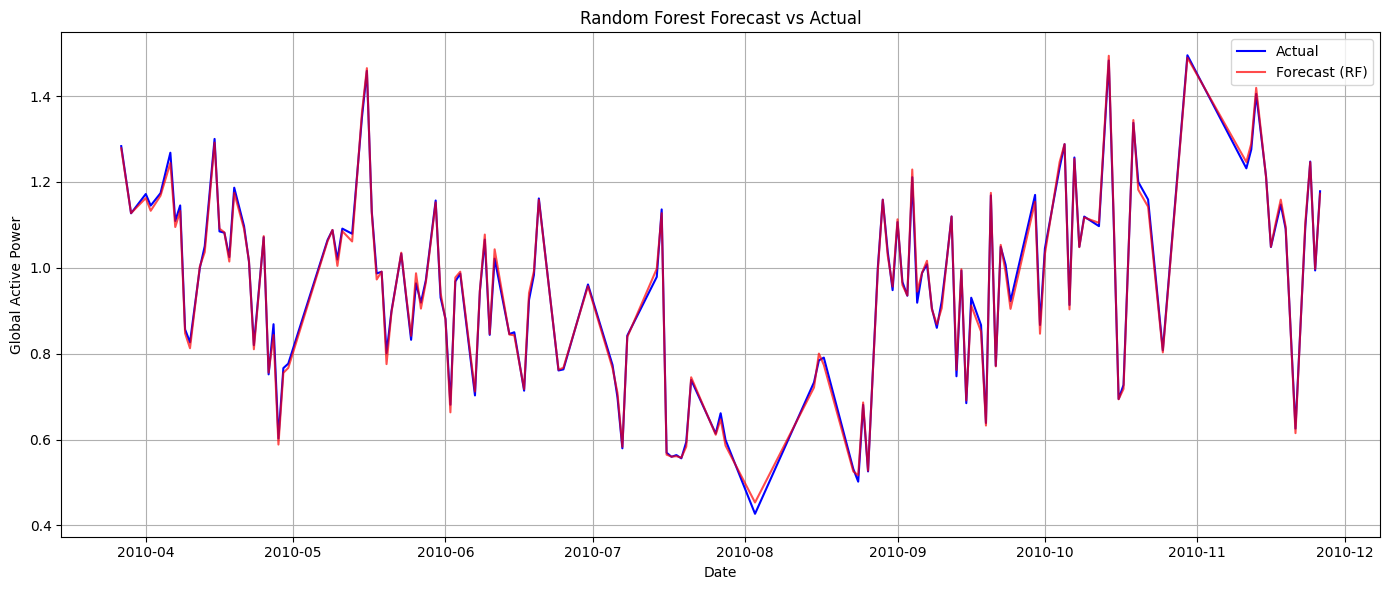

In [ ]:
columns = ['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Rolling_Mean_15', 'Rolling_Mean_16',
       'Rolling_Mean_17', 'Rolling_Mean_18', 'Rolling_Mean_19',
       'Rolling_Mean_20', 'Rolling_Mean_21', 'Rolling_Mean_22',
       'Rolling_Mean_23', 'Rolling_Mean_24', 'Rolling_Mean_25',
       'Rolling_Mean_26', 'Rolling_Mean_27', 'Rolling_Mean_28',
       'Rolling_Mean_29', 'Rolling_Mean_30', 'Rolling_Mean_31',
       'Rolling_Mean_32', 'Rolling_Mean_33', 'Rolling_Mean_34',
       'Rolling_Mean_35', 'Rolling_Mean_36', 'Rolling_Mean_37',
       'Rolling_Mean_38', 'Rolling_Mean_39', 'Rolling_Mean_40',
       'Rolling_Mean_41', 'Rolling_Mean_42', 'Rolling_Mean_43',
       'Rolling_Mean_44', 'Rolling_Mean_45', 'Rolling_Mean_46',
       'Rolling_Mean_47', 'Rolling_Mean_48', 'Rolling_Mean_49',
       'Rolling_Mean_50', 'Lag_1', 'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30',
       'Lag_60', 'dayofweek', 'month', 'day', 'is_weekend', 'is_holiday']
target = 'Global_active_power'

# Split data
X = energy_ml[columns]
y = energy_ml[target]

# Use time-aware train-test split
split_idx = int(len(X) * 0.8)
X_train_energy, X_test_energy = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_energy, y_test_energy = y.iloc[:split_idx], y.iloc[split_idx:]

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2] # Minimum number of samples required to be at a leaf node
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_energy, y_train_energy)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test_energy)
rmse_rf = np.sqrt(mean_squared_error(y_test_energy, y_pred_rf))
mae_rf = mean_absolute_error(y_test_energy, y_pred_rf)
mape_rf = np.mean(np.abs((y_test_energy - y_pred_rf) / y_test_energy)) * 100

# Output metrics
print("Best Hyperparameters:", grid_search.best_params_)
print(f'Random Forest RMSE: {rmse_rf:.4f}')
print(f'Random Forest MAE: {mae_rf:.4f}')
print(f'Random Forest MAPE: {mape_rf:.2f}%')

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_energy.index, y_test_energy, label='Actual', color='blue')
plt.plot(y_test_energy.index, y_pred_rf, label='Forecast (RF)', color='red', alpha=0.7)
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Global Active Power')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## End Of Section 3:

>### Deep Learning Models (LSTM)

In [ ]:
energy_ml.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Rolling_Mean_15', 'Rolling_Mean_16',
       'Rolling_Mean_17', 'Rolling_Mean_18', 'Rolling_Mean_19',
       'Rolling_Mean_20', 'Rolling_Mean_21', 'Rolling_Mean_22',
       'Rolling_Mean_23', 'Rolling_Mean_24', 'Rolling_Mean_25',
       'Rolling_Mean_26', 'Rolling_Mean_27', 'Rolling_Mean_28',
       'Rolling_Mean_29', 'Rolling_Mean_30', 'Rolling_Mean_31',
       'Rolling_Mean_32', 'Rolling_Mean_33', 'Rolling_Mean_34',
       'Rolling_Mean_35', 'Rolling_Mean_36', 'Rolling_Mean_37',
       'Rolling_Mean_38', 'Rolling_Mean_39', 'Rolling_Mean_40',
       'Rolling_Mean_41', 'Rolling_Mean_42', 'Rolling_Mean_43',
       'Rolling_Mean_44', 'Rolling_Mean_45', 'Rolling_Mean_46',
       'Rolling_Mean_47', 'Rolling_Mean_48', 'Rolling_Mean_49',
       'Rolling_Mean_50', 'Lag_1', 'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30',
       'Lag_60', 'dayofweek', 

X_train shape: (559, 30, 54)
Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.1482 - val_loss: 0.0411
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 0.0249 - val_loss: 0.0387
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0215 - val_loss: 0.0420
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0220 - val_loss: 0.0387
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0238 - val_loss: 0.0384
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0201 - val_loss: 0.0380
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0217 - val_loss: 0.0411
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0191 - val_loss: 0.0380
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0209 - val_loss: 0.0377
Epoch 10/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0218 - val_loss: 0.0382
Epoch 11/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0199 - val_loss: 0.0384
Epoch 12/20
16/16 ━━━━━━━━━━━━━━

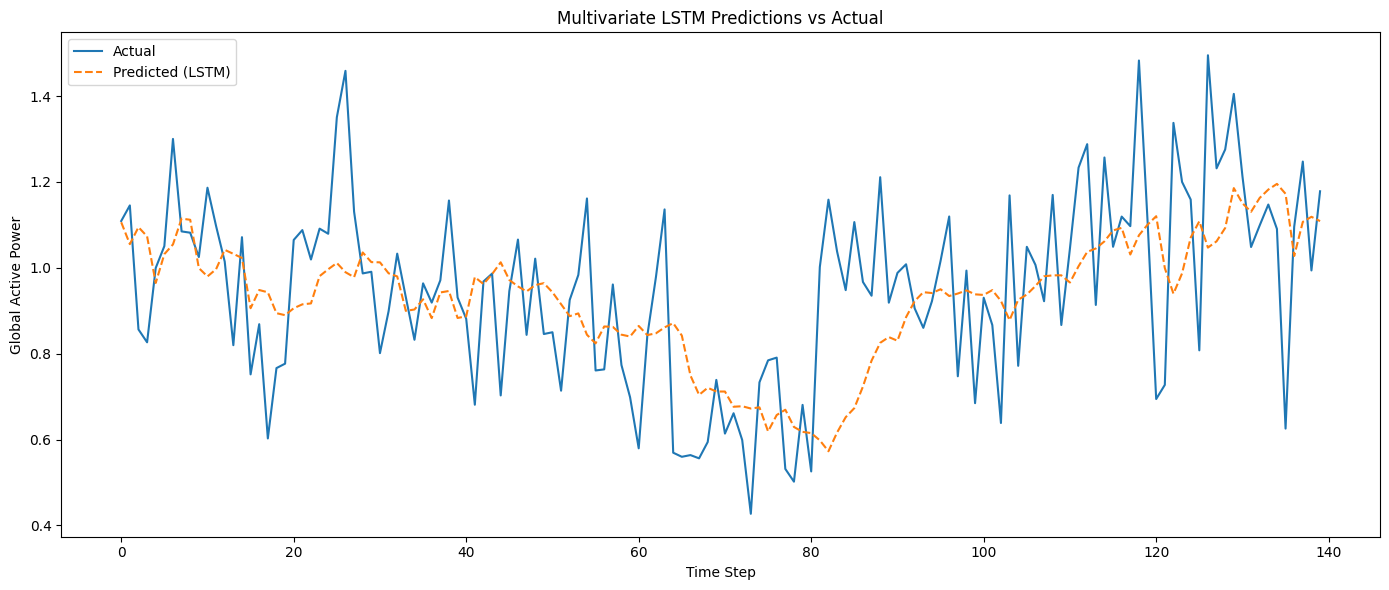

In [ ]:
# --- 1. Preprocessing: Normalize data and create sequences ---

# Select multivariate features
features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Rolling_Mean_15', 'Rolling_Mean_16',
       'Rolling_Mean_17', 'Rolling_Mean_18', 'Rolling_Mean_19',
       'Rolling_Mean_20', 'Rolling_Mean_21', 'Rolling_Mean_22',
       'Rolling_Mean_23', 'Rolling_Mean_24', 'Rolling_Mean_25',
       'Rolling_Mean_26', 'Rolling_Mean_27', 'Rolling_Mean_28',
       'Rolling_Mean_29', 'Rolling_Mean_30', 'Rolling_Mean_31',
       'Rolling_Mean_32', 'Rolling_Mean_33', 'Rolling_Mean_34',
       'Rolling_Mean_35', 'Rolling_Mean_36', 'Rolling_Mean_37',
       'Rolling_Mean_38', 'Rolling_Mean_39', 'Rolling_Mean_40',
       'Rolling_Mean_41', 'Rolling_Mean_42', 'Rolling_Mean_43',
       'Rolling_Mean_44', 'Rolling_Mean_45', 'Rolling_Mean_46',
       'Rolling_Mean_47', 'Rolling_Mean_48', 'Rolling_Mean_49',
       'Rolling_Mean_50', 'Lag_1', 'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30',
       'Lag_60', 'dayofweek', 'month', 'day', 'is_weekend', 'is_holiday']
dependant = energy_ml[features].copy()

# Normalize
scaler_lst = MinMaxScaler()
scaled_data = scaler_lst.fit_transform(dependant)

# Function to create sequences for multivariate input
def create_multivariate_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])         # All features
        y.append(data[i][0])                    # Only predict 'Global_active_power'
    return np.array(X), np.array(y)

# Create sequences
window_size = 30  # e.g., 30 time steps (days)
X, y = create_multivariate_sequences(scaled_data, window_size)

# Split into train/test
split = int(len(X) * 0.8)
X_train_lst, X_test_lst = X[:split], X[split:]
y_train_lst, y_test_lst = y[:split], y[split:]

print("X_train shape:", X_train_lst.shape)  # Expecting (samples, time_steps, features)

# --- 2. Build and Train LSTM model ---
model_lst = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lst.shape[1], X_train_lst.shape[2])),
    Dense(1)
])
model_lst.compile(optimizer='adam', loss='mse')

# Train the model
history = model_lst.fit(X_train_lst, y_train_lst, epochs=20, batch_size=32, validation_split=0.1)

# --- Predict and Invert Scaling ---
y_pred_lst = model_lst.predict(X_test_lst)

# Inverse transform: we need to expand prediction & actuals to match scaler shape
y_test_expanded = np.zeros((len(y_test_lst), scaled_data.shape[1]))
y_pred_expanded = np.zeros((len(y_pred_lst), scaled_data.shape[1]))

y_test_expanded[:, 0] = y_test_lst
y_pred_expanded[:, 0] = y_pred_lst[:, 0]

y_test_inv = scaler_lst.inverse_transform(y_test_expanded)[:, 0]
y_pred_inv = scaler_lst.inverse_transform(y_pred_expanded)[:, 0]

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# --- Visualization ---
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted (LSTM)', linestyle='--')
plt.title('Multivariate LSTM Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


## End Of Section 4: 

>### Saving The Best Model and its Scaler

In [ ]:
# Saving the data, model and scaler
import joblib

joblib.dump(best_rf, "best_model_energy.pkl") # Save the best Random Forest model

energy_ml.reset_index().to_csv("energy_new.csv", index=False)



# __Stock Prices__

In [ ]:
stock = pd.read_csv("all_stocks_5yr.csv") # Reading the stock data
stock

date   open   high    low  close    volume Name
0       2013-02-08  15.07  15.12  14.63  14.75   8407500  AAL
1       2013-02-11  14.89  15.01  14.26  14.46   8882000  AAL
2       2013-02-12  14.45  14.51  14.10  14.27   8126000  AAL
3       2013-02-13  14.30  14.94  14.25  14.66  10259500  AAL
4       2013-02-14  14.94  14.96  13.16  13.99  31879900  AAL
...            ...    ...    ...    ...    ...       ...  ...
619035  2018-02-01  76.84  78.27  76.69  77.82   2982259  ZTS
619036  2018-02-02  77.53  78.12  76.73  76.78   2595187  ZTS
619037  2018-02-05  76.64  76.92  73.18  73.83   2962031  ZTS
619038  2018-02-06  72.74  74.56  72.13  73.27   4924323  ZTS
619039  2018-02-07  72.70  75.00  72.69  73.86   4534912  ZTS

[619040 rows x 7 columns]

In [ ]:
#Handling Duplicates
print(stock.index.duplicated().sum())
print(stock.duplicated().sum())

0
0


In [ ]:
stock.isna().sum()

date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64

In [ ]:
#Using a multiindex to prevent false duplicates and allow easy groupby
stock['date'] = pd.to_datetime(stock['date']) # Converting the 'date' column to datetime format
stock = stock.set_index(['Name', 'date']) # Setting a multiindex with 'Name' and 'date' columns

In [ ]:
stock

open   high    low  close    volume
Name date                                            
AAL  2013-02-08  15.07  15.12  14.63  14.75   8407500
     2013-02-11  14.89  15.01  14.26  14.46   8882000
     2013-02-12  14.45  14.51  14.10  14.27   8126000
     2013-02-13  14.30  14.94  14.25  14.66  10259500
     2013-02-14  14.94  14.96  13.16  13.99  31879900
...                ...    ...    ...    ...       ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82   2982259
     2018-02-02  77.53  78.12  76.73  76.78   2595187
     2018-02-05  76.64  76.92  73.18  73.83   2962031
     2018-02-06  72.74  74.56  72.13  73.27   4924323
     2018-02-07  72.70  75.00  72.69  73.86   4534912

[619040 rows x 5 columns]

In [ ]:
#Handling Duplicates
print(stock.index.duplicated().sum())
print(stock.duplicated().sum())

0
754


In [ ]:
duplicates = stock[stock.duplicated(keep=False)]
print(duplicates.head(40))


                   open     high      low   close   volume
Name date                                                 
AAP  2014-10-30  144.71  146.500  144.710  146.27   579751
     2014-11-12  144.71  146.500  144.710  146.27   579751
ABC  2014-08-01   77.28   77.920   76.540   77.79  3296305
     2014-08-04   77.28   77.920   76.540   77.79  3296305
     2014-10-30   87.95   88.780   87.540   88.71  1323449
     2014-11-12   87.95   88.780   87.540   88.71  1323449
ABT  2014-07-17   41.90   42.800   41.776   42.73  9538018
     2014-07-18   41.90   42.800   41.776   42.73  9538018
     2014-08-01   42.12   42.500   41.838   42.39  3639066
     2014-08-04   42.12   42.500   41.838   42.39  3639066
     2014-08-26   42.40   42.790   42.350   42.76  4143531
     2014-09-03   42.40   42.790   42.350   42.76  4143531
     2014-10-29   43.93   43.990   43.340   43.66  4193219
     2014-11-05   43.93   43.990   43.340   43.66  4193219
ACN  2014-08-01   78.97   79.490   78.500   79.35  21609

>## The duplicates could be due to data vendor issues since they all occur of different dates. Therefore, it would distort my analysis if i remove them

## Missing Values

In [ ]:
#Checking for missing values
stock.isna().sum()

open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [ ]:
#Displaying rows with missing values
stock[stock.isna().any(axis=1)]

open   high    low     close   volume
Name date                                             
BHF  2017-07-26   NaN    NaN    NaN   69.0842        3
DHR  2015-07-17   NaN  88.76  88.24   88.7200  2056819
     2016-01-12   NaN    NaN    NaN   88.5500        0
ES   2015-07-17   NaN  48.49  47.85   47.9200  1246786
FTV  2016-07-01   NaN    NaN    NaN   49.5400        0
O    2015-07-17   NaN  47.31  46.83   46.9900  1229513
     2016-01-12   NaN    NaN    NaN   52.4300        0
REGN 2015-06-09   NaN    NaN    NaN  526.0900    12135
UA   2016-04-07   NaN    NaN    NaN   41.5600        0
VRTX 2015-05-12   NaN    NaN    NaN  124.0800   569747
WRK  2015-06-26   NaN    NaN    NaN   61.9000      100

In [5]:
stock.sort_index()

open   high    low  close   volume
Name date                                           
A    2013-02-08  45.07  45.35  45.00  45.08  1824755
     2013-02-11  45.17  45.18  44.45  44.60  2915405
     2013-02-12  44.81  44.95  44.50  44.62  2373731
     2013-02-13  44.81  45.24  44.68  44.75  2052338
     2013-02-14  44.72  44.78  44.36  44.58  3826245
...                ...    ...    ...    ...      ...
ZTS  2018-02-01  76.84  78.27  76.69  77.82  2982259
     2018-02-02  77.53  78.12  76.73  76.78  2595187
     2018-02-05  76.64  76.92  73.18  73.83  2962031
     2018-02-06  72.74  74.56  72.13  73.27  4924323
     2018-02-07  72.70  75.00  72.69  73.86  4534912

[619040 rows x 5 columns]

In [6]:
stock.fillna(method='ffill', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1693037890.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock.fillna(method='ffill', inplace=True)


In [ ]:
stock.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

## Outliers

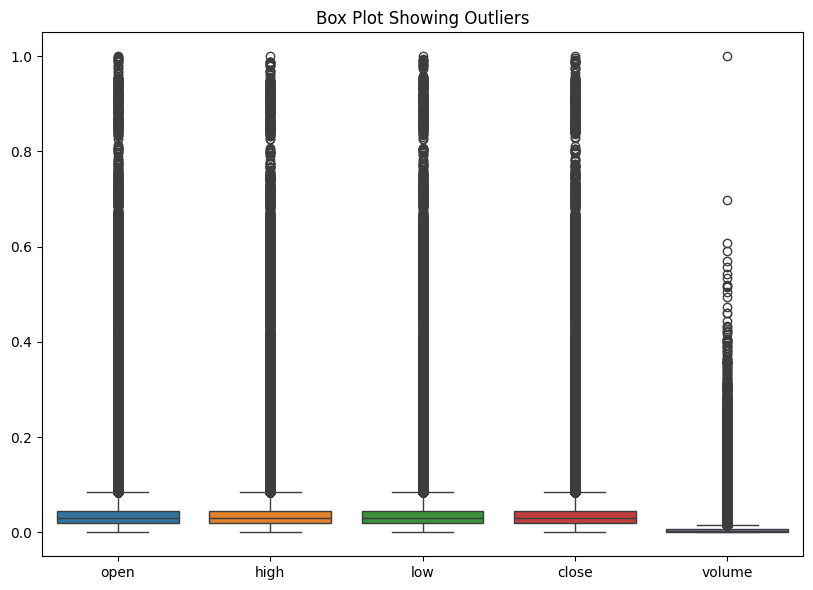

In [ ]:
import seaborn as sns

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(stock), columns=stock.columns)

plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Box Plot Showing Outliers")
plt.tight_layout()
plt.show()

In [ ]:
stock.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [7]:
def remove_outliers(df, columns):
    df_filtered = df.copy()

    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.6* IQR
        upper_bound = Q3 + 0.6* IQR

        # Filter out rows where the column value is outside the bounds
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered
stock_columns = ['open', 'high', 'low', 'close', 'volume']
stock_clean = remove_outliers(stock, stock_columns)


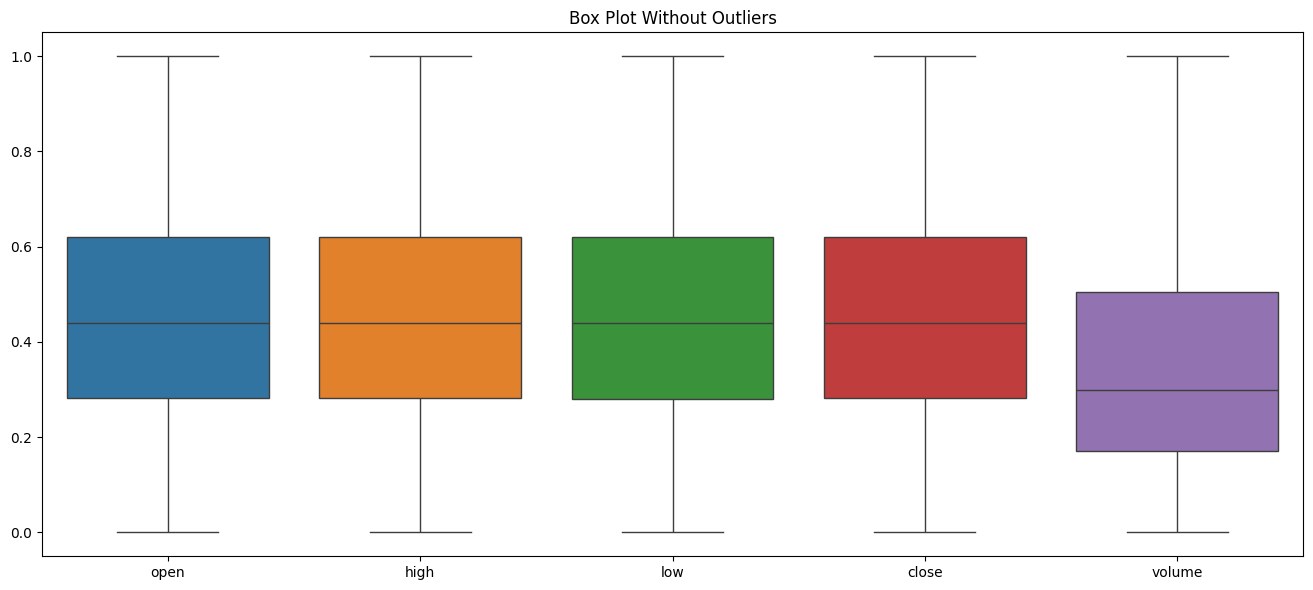

In [ ]:
import seaborn as sns
plt.figure(figsize=(26,6))

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(stock_clean), columns=stock_clean.columns)

plt.subplot(1, 2, 1)
sns.boxplot(data=df_scaled)
plt.title("Box Plot Without Outliers")
plt.tight_layout()
plt.show()

In [ ]:
stock_clean.index.get_level_values('Name').unique() # Displaying unique stock names from multiindex

Index(['AAL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP',
       ...
       'XLNX', 'XL', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=478)

>## Selecting 2 companies only to go along with the analysis

In [ ]:
selected_companies =['ZION', 'XRAY']
stock_subset = stock_clean.loc[stock_clean.index.get_level_values('Name').isin(selected_companies)] # Filtering the dataset for selected companies
stock_subset.sort_index(inplace=True)

In [ ]:
stock_subset.isna().sum()

open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [ ]:
stock_subset.duplicated().sum()

np.int64(0)

In [10]:
xray = stock_subset.loc['XRAY']
xray.sort_index(inplace=True)


In [11]:
zion = stock_subset.loc['ZION']
zion.sort_index(inplace=True)


>## Time Series Plots For Companies, XRAY and ZION

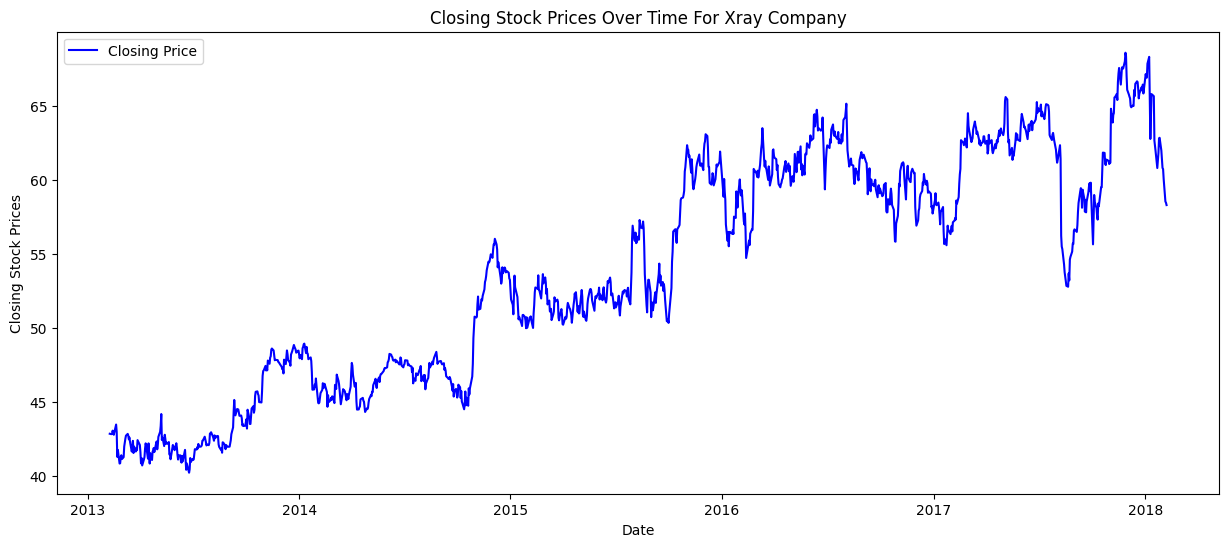

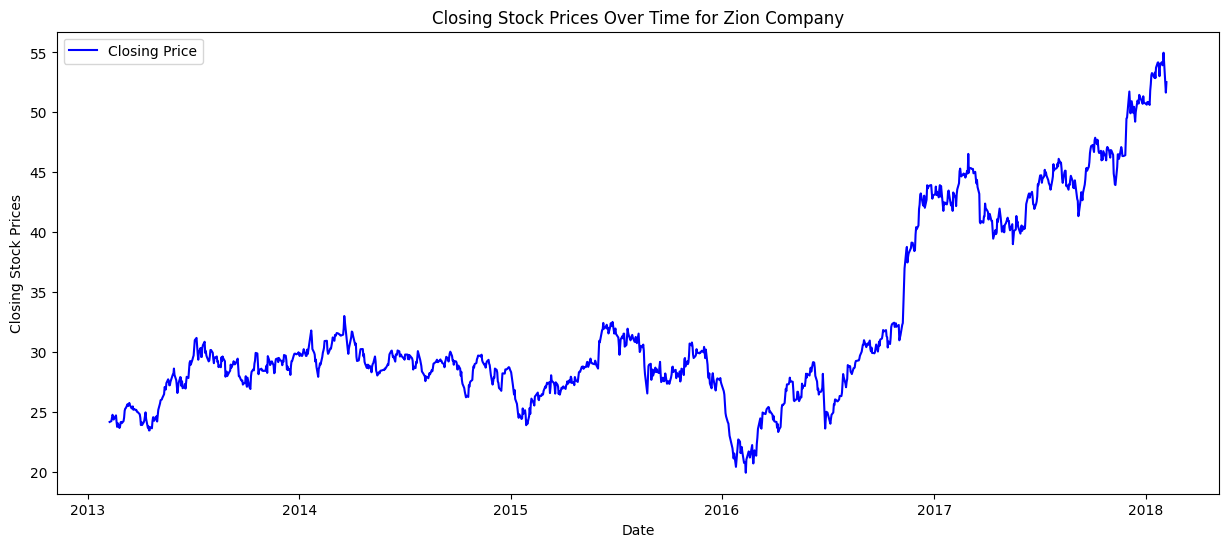

In [ ]:
#Time Series Plot Of the Global Active Power
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.plot(xray.index, xray['close'], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Stock Prices")
plt.title("Closing Stock Prices Over Time For Xray Company")
plt.legend()

plt.figure(figsize=(15, 6))
plt.plot(zion.index, zion['close'], label="Closing Price", color="blue")
plt.xlabel("Date")
plt.ylabel("Closing Stock Prices")
plt.title("Closing Stock Prices Over Time for Zion Company")
plt.legend()

plt.show()

># __STEP 2:__ Identifying Trend and Seasonality
### Decomposition For Xray company

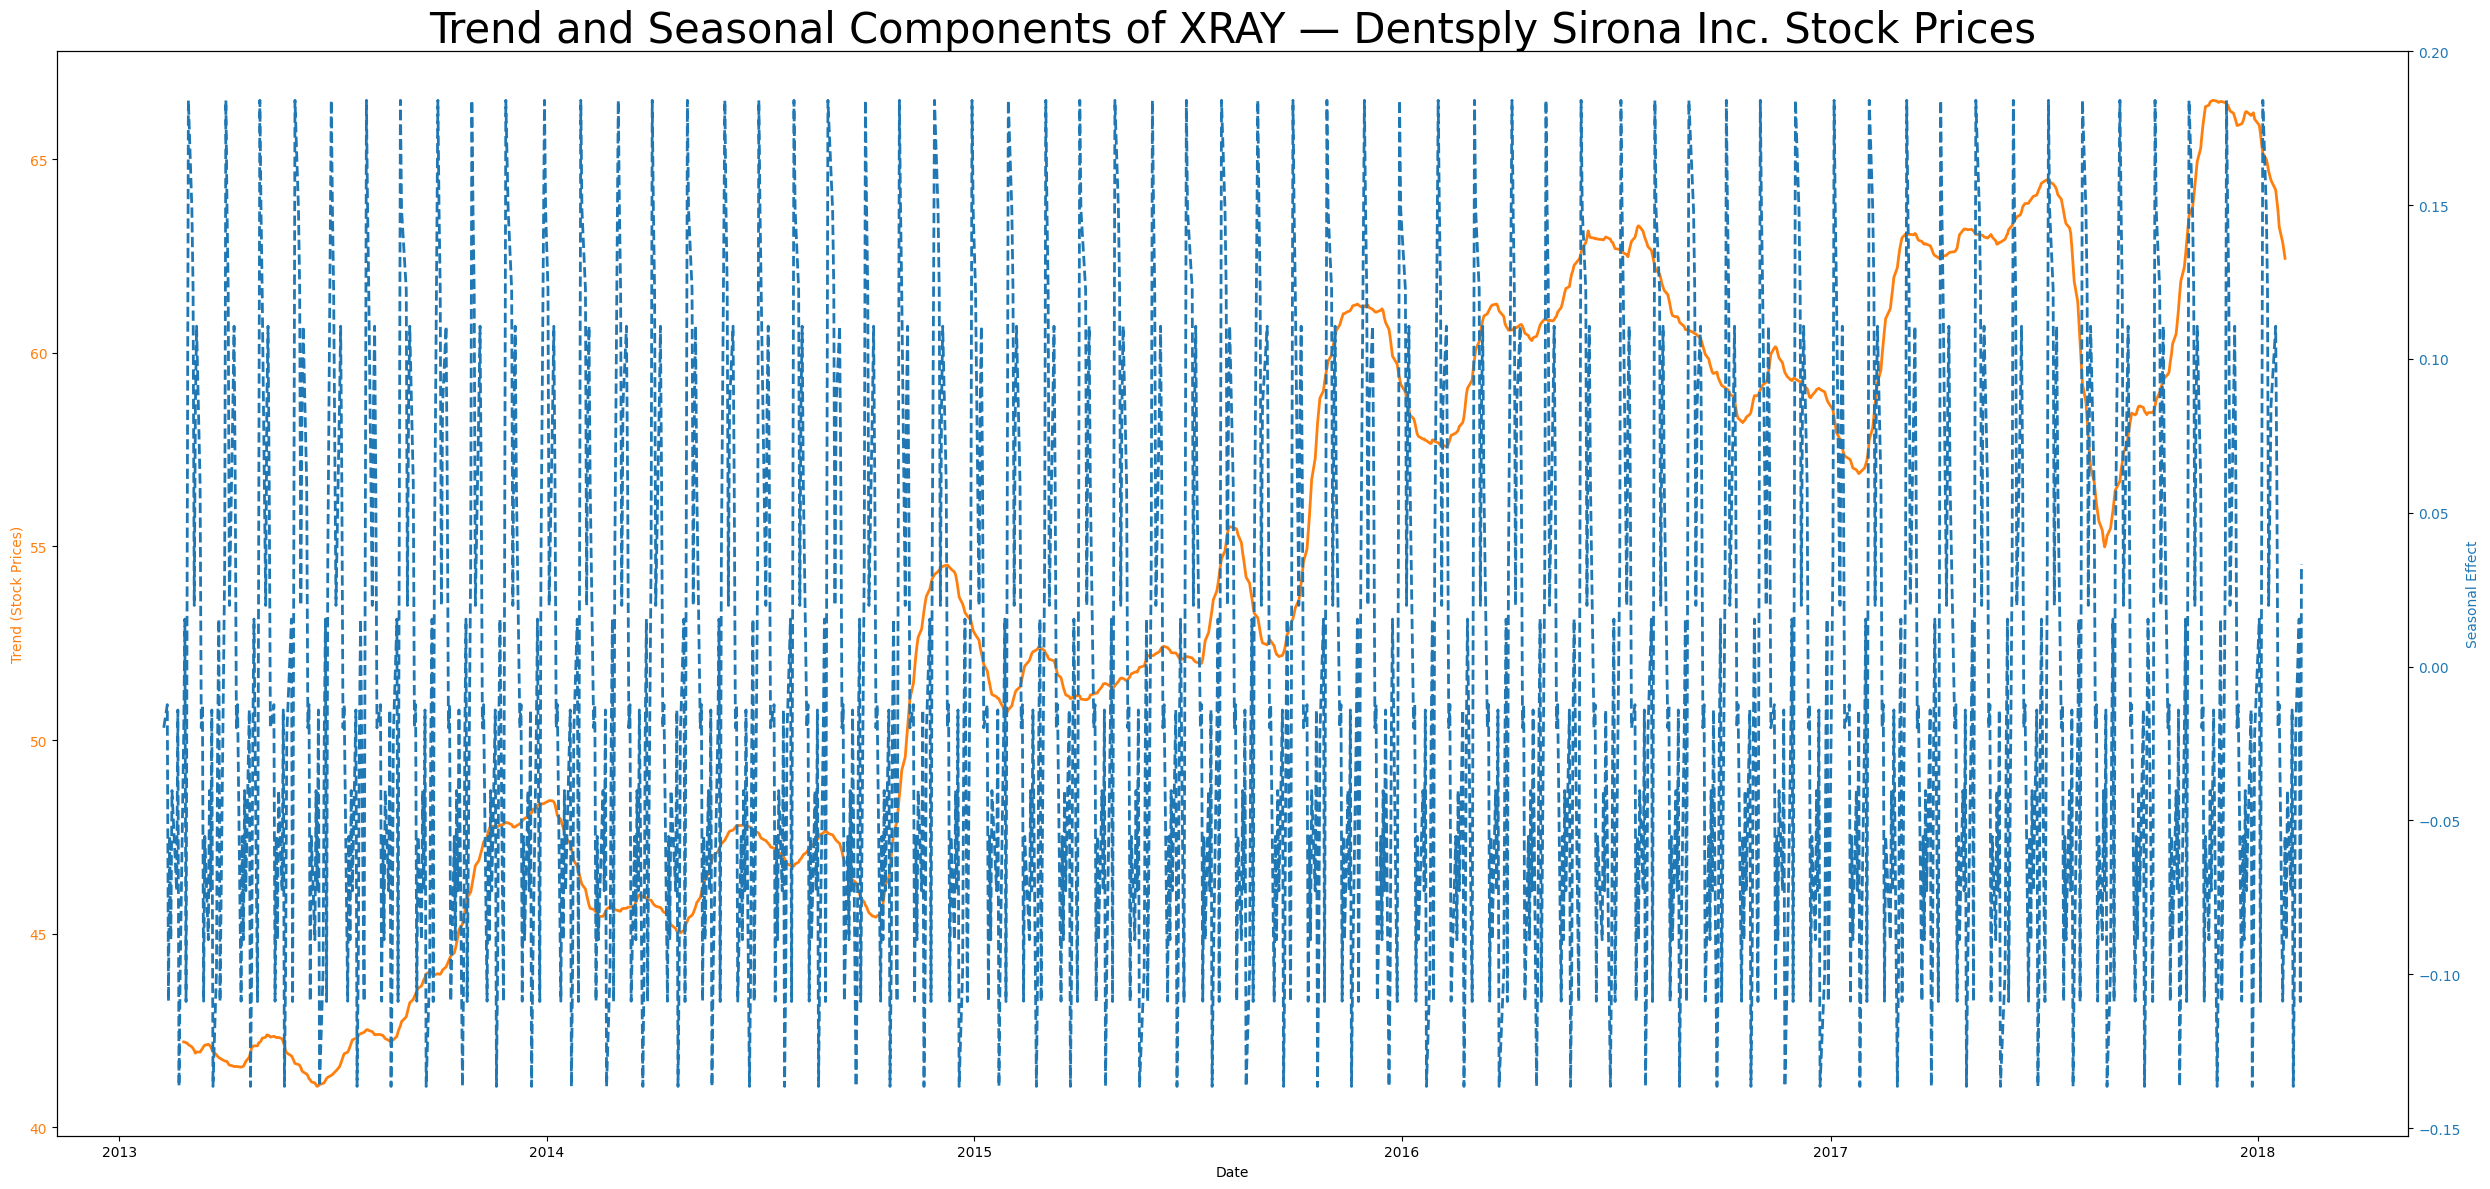

In [12]:
# Decompose the time series (yearly seasonality for daily data)
decomposition = seasonal_decompose(xray['close'], model='additive', period=21)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(25, 12))

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trend (Stock Prices)', color=color)
ax1.plot(trend, color=color, label='Trend', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for seasonality
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Seasonal Effect', color=color)
ax2.plot(seasonal, color=color, label='Seasonality', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Trend and Seasonal Components of XRAY — Dentsply Sirona Inc. Stock Prices', fontsize=30)
fig.tight_layout()

plt.show()


### Decomposition For Zion Company

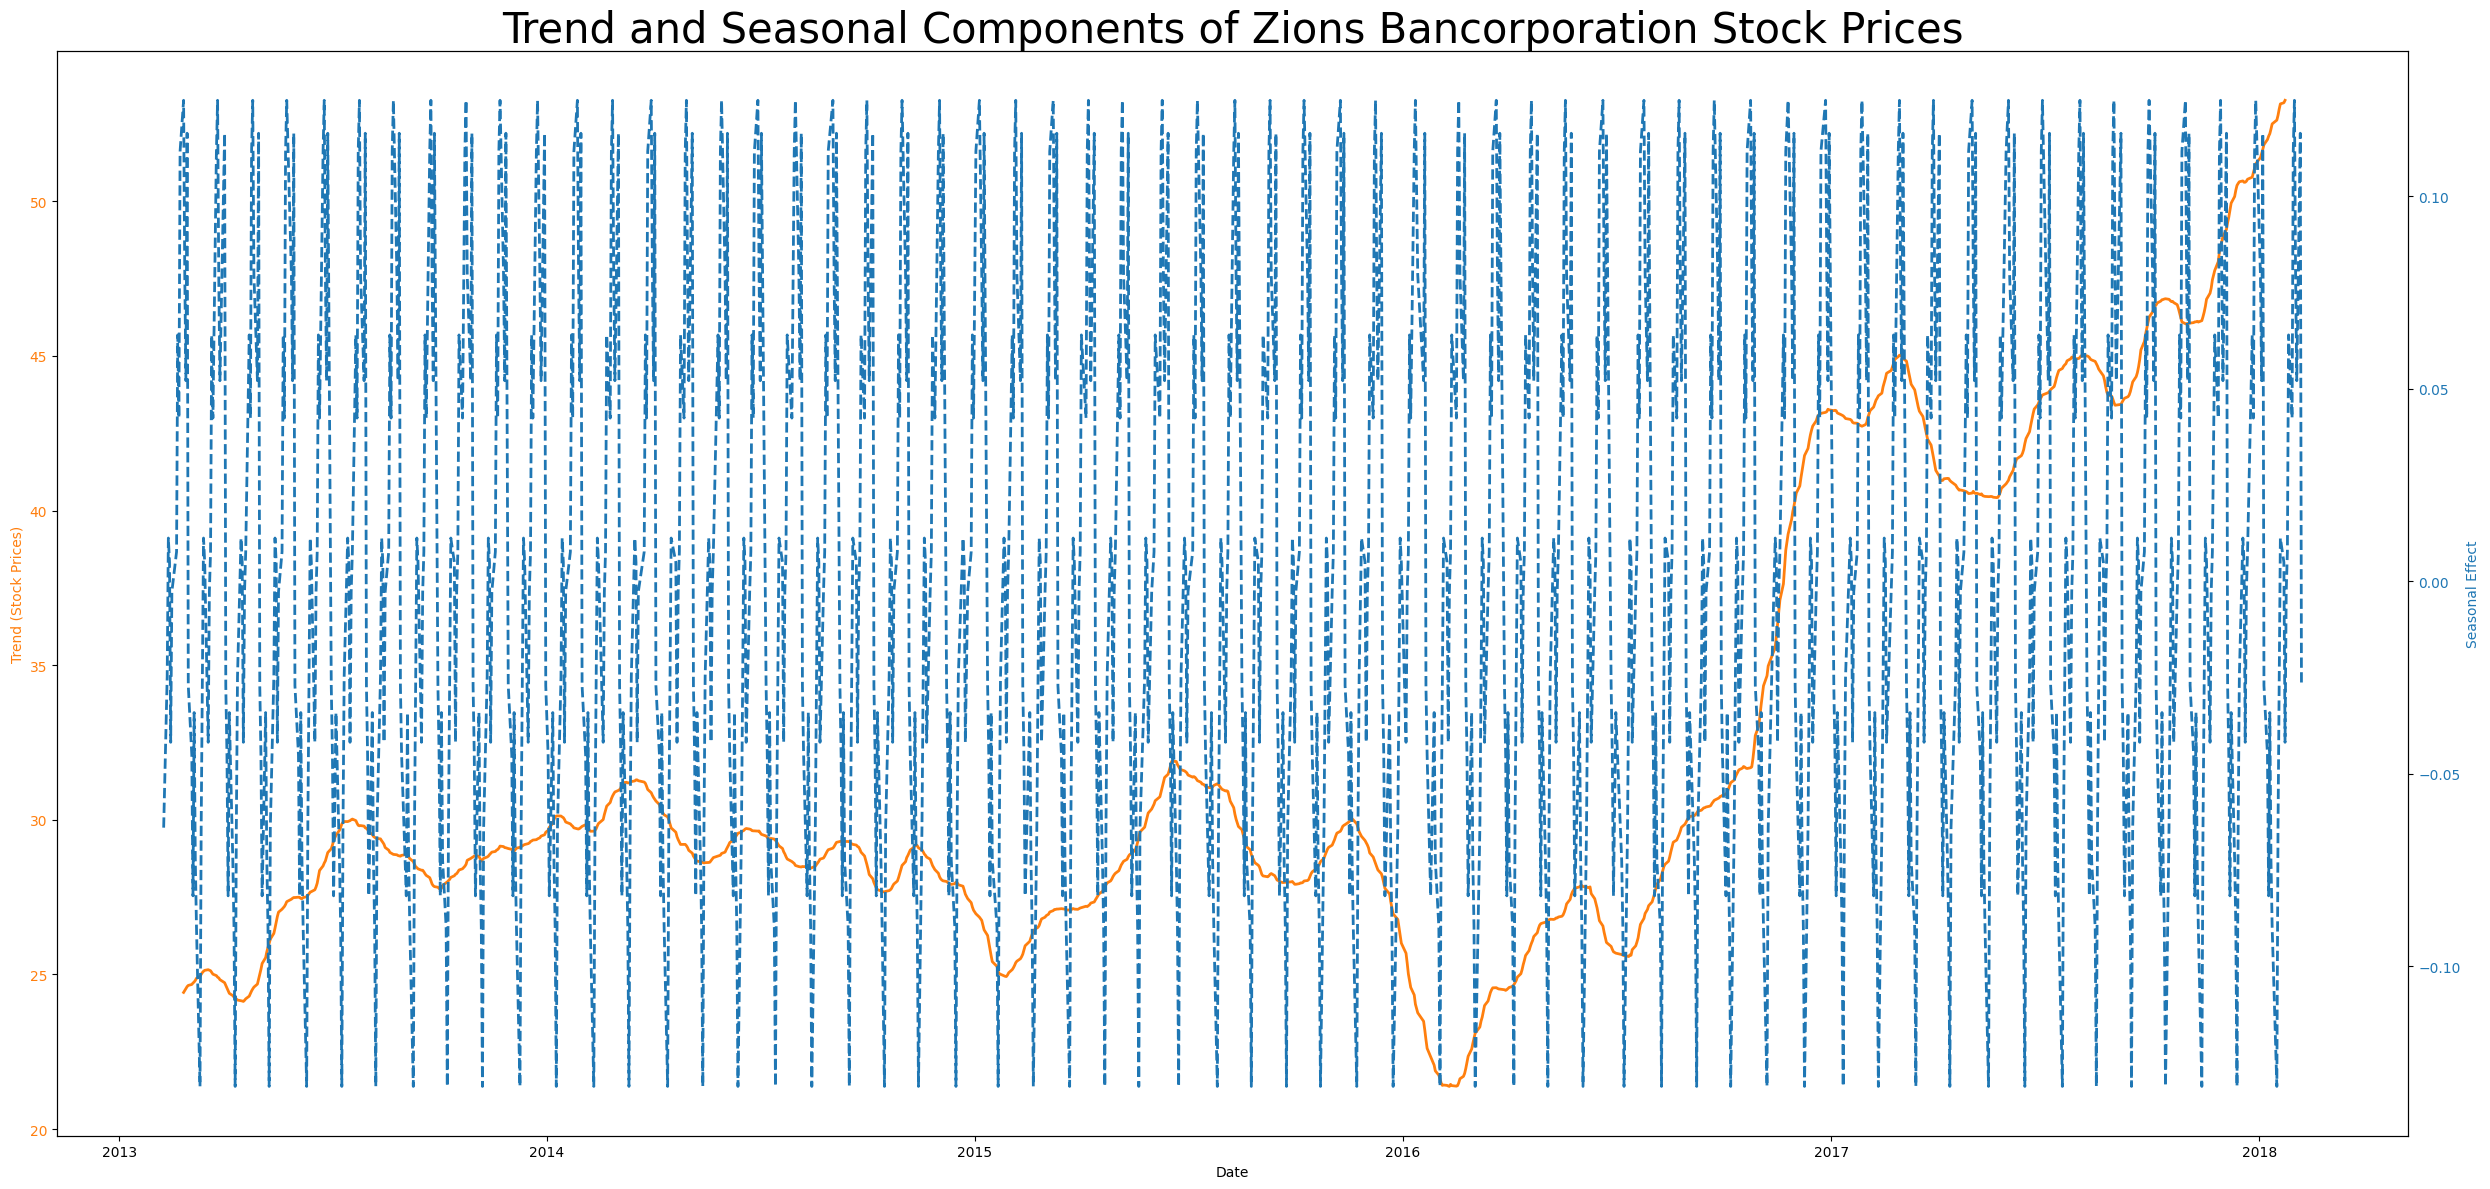

In [13]:
# Decompose the time series (yearly seasonality for daily data)
decomposition = seasonal_decompose(zion['close'], model='additive', period=21)

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal

# Plot with dual y-axis
fig, ax1 = plt.subplots(figsize=(25, 12))

color = 'tab:orange'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trend (Stock Prices)', color=color)
ax1.plot(trend, color=color, label='Trend', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)

# Create second y-axis for seasonality
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Seasonal Effect', color=color)
ax2.plot(seasonal, color=color, label='Seasonality', linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Trend and Seasonal Components of Zions Bancorporation Stock Prices', fontsize=30)
fig.tight_layout()

plt.show()


>## Multivariate Correlation Statistics Via Heatmap (Viewing for the original dataset)

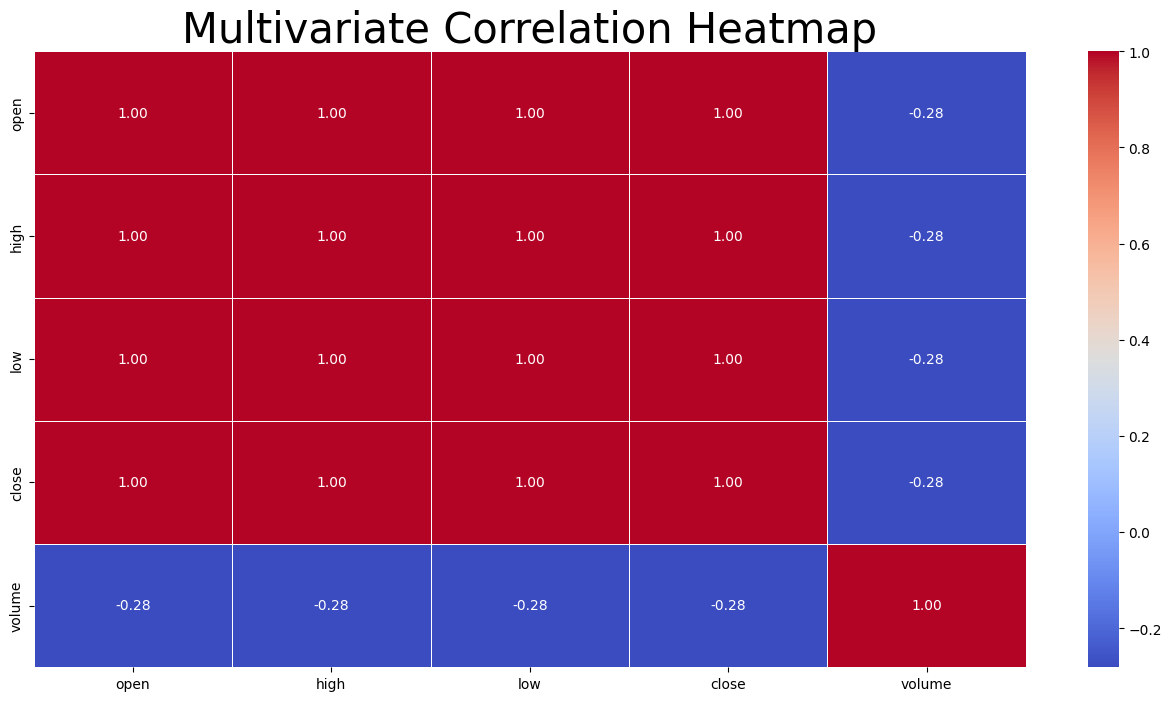

In [ ]:
correlation_matrix = stock_clean.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Multivariate Correlation Heatmap", fontsize=30)
plt.show()


In [ ]:
stock_clean.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [ ]:
print(stock_subset.index.is_monotonic_increasing)  # Should be True now
print(stock_subset.index.duplicated().sum())  # Should be 0 now

True
0


>## Checking Stationarity

In [ ]:
#Using the ADF test to check for stationarity
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(stock_subset['close'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -1.6530544995300367
p-value: 0.45544790334914437


In [ ]:
#Using the KPSS test to check for stationarity

import statsmodels.tsa.stattools as smt
kpss_stat, p_value, lags, crit_values = smt.kpss(stock_subset['close'], regression='c', nlags="auto")

# Print results
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-Value: {p_value}')

KPSS Statistic: 2.9874876415830633
P-Value: 0.01


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14028\1785482982.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_stat, p_value, lags, crit_values = smt.kpss(stock_subset['close'], regression='c', nlags="auto")


>## The Series is non-stationary

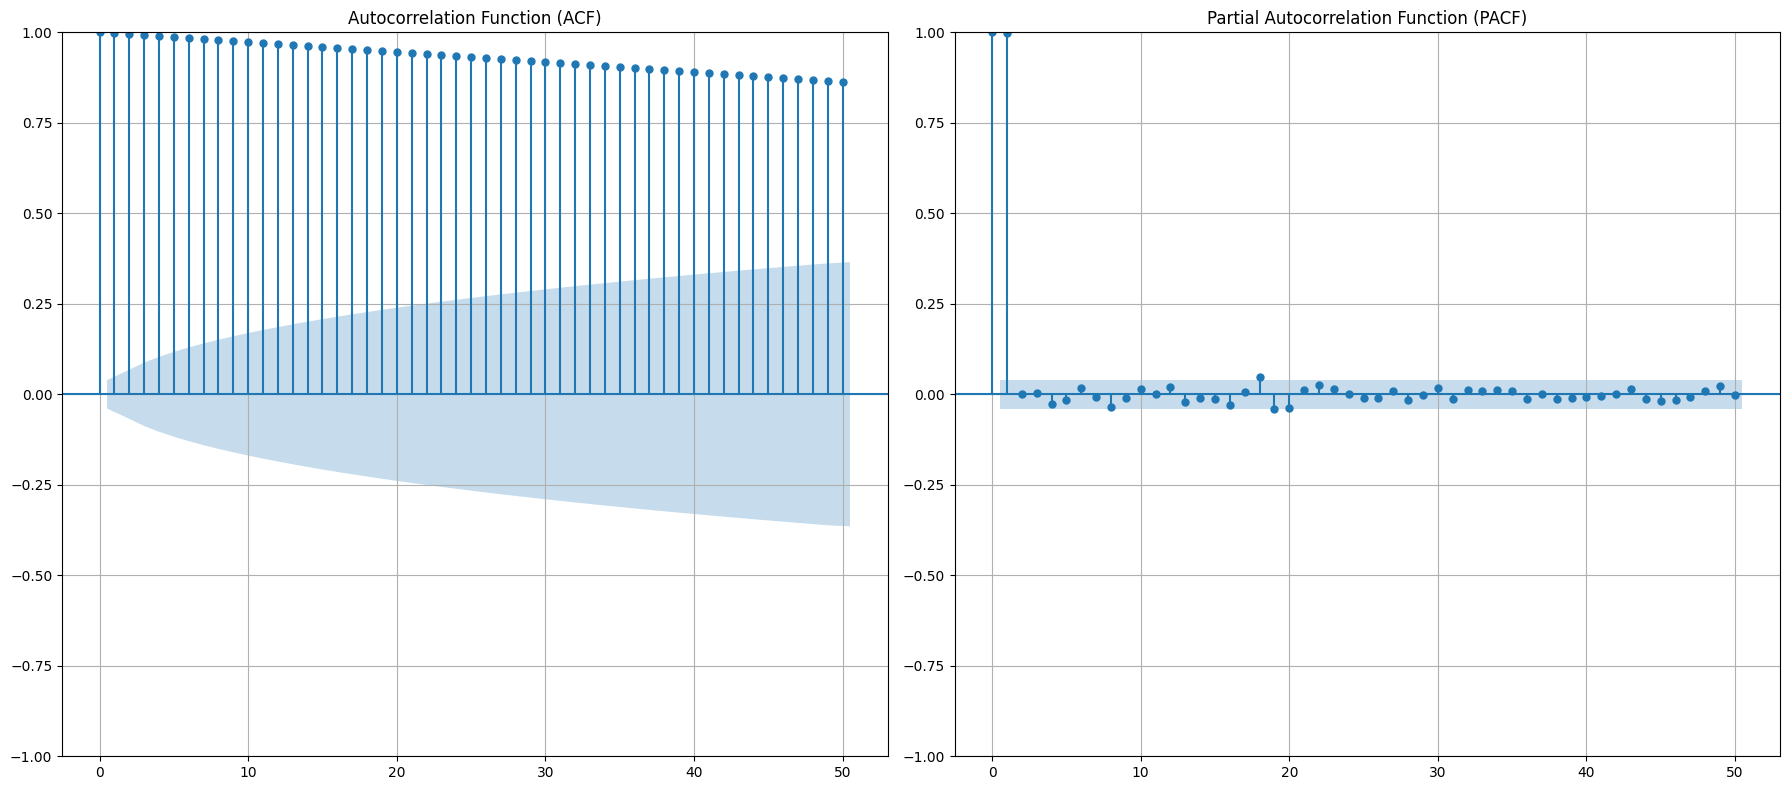

In [ ]:
#Plotting ACF and PACF
# Set up the plot area
plt.figure(figsize=(18, 8))

# Plot ACF

plt.subplot(1, 2, 1)
plot_acf(stock_subset['close'], lags=50, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.grid(True)

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(stock_subset['close'], lags=50, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)', method='ywm')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# First Differencing
stock_subset['close_diff'] = stock_subset['close'].diff().dropna()
stock_subset.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\878550091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_subset['close_diff'] = stock_subset['close'].diff().dropna()


open   high     low  close  volume  close_diff
Name date                                                       
XRAY 2013-02-08  42.66  42.88  42.590  42.87  624374         NaN
     2013-02-11  42.87  42.90  42.665  42.84  422288       -0.03
     2013-02-12  42.82  42.99  42.690  42.87  357918        0.03
     2013-02-13  42.89  43.39  42.700  43.08  851215        0.21
     2013-02-14  42.89  43.00  42.680  42.91  759836       -0.17

>## Creating time-based Variables

In [15]:
#Engineering time-based features (lagged values and rolling mean)
for window in range(15, 51):
    stock_subset[f'Rolling_Mean_{window}'] = stock_subset['close'].rolling(window=window).mean()

# Choosing lags that capture different temporal patterns
lag_list = [1, 7, 14, 21, 30, 60]

for lag in lag_list:
    stock_subset[f'Lag_{lag}'] = stock_subset['close'].shift(lag)

stock_subset = stock_subset.dropna()
stock_subset

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1789071619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_subset[f'Rolling_Mean_{window}'] = stock_subset['close'].rolling(window=window).mean()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1789071619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_subset[f'Rolling_Mean_{window}'] = stock_subset['close'].rolling(window=window).mean()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1789071619.py:3: SettingWithCopyWarning: 
A value 

open    high      low  close   volume  close_diff  \
Name date                                                             
XRAY 2013-05-07  42.97  43.400  42.8734  43.39   603388        0.39   
     2013-05-08  43.39  44.210  43.2100  44.20   917802        0.81   
     2013-05-09  40.55  42.650  40.5000  42.45  2811780       -1.75   
     2013-05-10  42.57  43.070  42.4520  42.64   951080        0.19   
     2013-05-13  42.47  42.625  41.9250  42.04  1034458       -0.60   
...                ...     ...      ...    ...      ...         ...   
ZION 2018-01-31  53.96  54.860  53.8700  54.03  2244164        0.10   
     2018-02-01  53.79  55.000  53.5900  54.98  3542047        0.95   
     2018-02-02  54.77  55.610  53.9800  54.15  4533570       -0.83   
     2018-02-05  53.54  54.160  51.2200  51.65  3305284       -2.50   
     2018-02-06  50.41  52.760  49.7610  52.52  3682542        0.87   

                 Rolling_Mean_15  Rolling_Mean_16  Rolling_Mean_17  \
Name date                                                            
XRAY 2013-05-07        41.962000        41.978125        41.931765   
     2013-05-08        42.146667        42.101875        42.108824   
     2013-05-09        42.252667        42.165625        42.122353   
     2013-05-10        42.324667        42.276875        42.193529   
     2013-05-13        42.387333        42.306875        42.262941   
...                          ...              ...              ...   
ZION 2018-01-31        53.520667        53.413750        53.249412   
     2018-02-01        53.696000        53.611875        53.505882   
     2018-02-02        53.765333        53.724375        53.643529   
     2018-02-05        53.656667        53.633125        53.602353   
     2018-02-06        53.631333        53.585625        53.567647   

                 Rolling_Mean_18  ...  Rolling_Mean_47  Rolling_Mean_48  \
Name date                         ...                                     
XRAY 2013-05-07        41.937778  ...        41.922766        41.912292   
     2013-05-08        42.057778  ...        41.987447        41.970208   
     2013-05-09        42.127778  ...        42.012128        41.997083   
     2013-05-10        42.151111  ...        42.025532        42.025208   
     2013-05-13        42.185000  ...        42.020213        42.025833   
...                          ...  ...              ...              ...   
ZION 2018-01-31        53.117222  ...        51.214681        51.124583   
     2018-02-01        53.345556  ...        51.398298        51.293125   
     2018-02-02        53.541667  ...        51.564255        51.455625   
     2018-02-05        53.532778  ...        51.675532        51.566042   
     2018-02-06        53.542222  ...        51.769787        51.693125   

                 Rolling_Mean_49  Rolling_Mean_50  Lag_1  Lag_7  Lag_14  \
Name date                                                                 
XRAY 2013-05-07        41.899796          41.8794  43.00  41.63   41.43   
     2013-05-08        41.958980          41.9458  43.39  42.20   40.86   
     2013-05-09        41.980000          41.9688  44.20  42.35   41.56   
     2013-05-10        42.010204          41.9932  42.45  41.82   41.10   
     2013-05-13        42.025510          42.0108  42.64  42.11   41.65   
...                          ...              ...    ...    ...     ...   
ZION 2018-01-31        51.042449          50.9476  53.93  54.16   52.35   
     2018-02-01        51.203265          51.1212  54.03  54.17   53.11   
     2018-02-02        51.351429          51.2622  54.98  53.74   53.28   
     2018-02-05        51.459592          51.3574  54.15  53.02   52.90   
     2018-02-06        51.585510          51.4808  51.65  54.02   53.32   

                 Lag_21  Lag_30  Lag_60  
Name date                                
XRAY 2013-05-07   41.13   41.67   42.87  
     2013-05-08   41.30   41.90   42.84  
     2013-05-09   41.87   41.76   42.87  
     2013-05-10   42.

In [ ]:
adf_result = adfuller(stock_subset['close_diff'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

ADF Statistic: -49.09850320200886
p-value: 0.0


In [ ]:
import statsmodels.tsa.stattools as smt

kpss_stat, p_value, lags, crit_values = smt.kpss(stock_subset['close_diff'], regression='c', nlags="auto")

# Print results
print(f'KPSS Statistic: {kpss_stat}')
print(f'P-Value: {p_value}')

KPSS Statistic: 0.11896095698585721
P-Value: 0.1


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14028\1256497689.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, p_value, lags, crit_values = smt.kpss(stock_subset['close_diff'], regression='c', nlags="auto")


In [16]:
xray = stock_subset.loc['XRAY']
xray.sort_index(inplace=True)


In [17]:
zion = stock_subset.loc['ZION']
zion.sort_index(inplace=True)


>## Viewing Trend and Seasonality For First Order Differencing

### For Xray Company

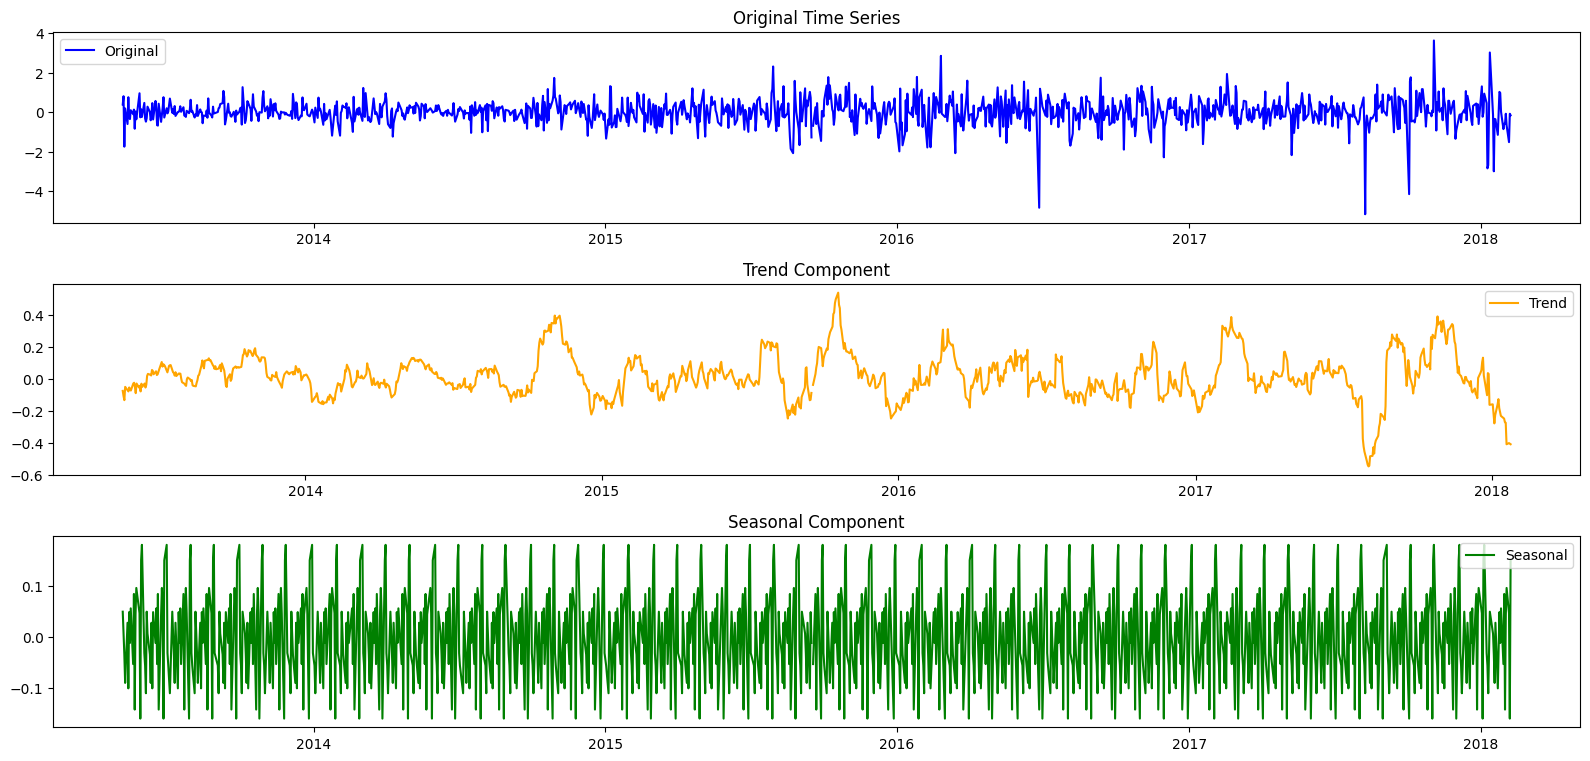

In [ ]:
import matplotlib as mpl

# Set the chunksize to a higher value (e.g., 1000)
mpl.rcParams['agg.path.chunksize'] = 1000

# Decompose the time series
decomposition = seasonal_decompose(xray['close_diff'], model='additive', period=21)  # Monthly data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(16, 10))

plt.subplot(4, 1, 1)
plt.plot(xray['close_diff'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()


### For Zion Company

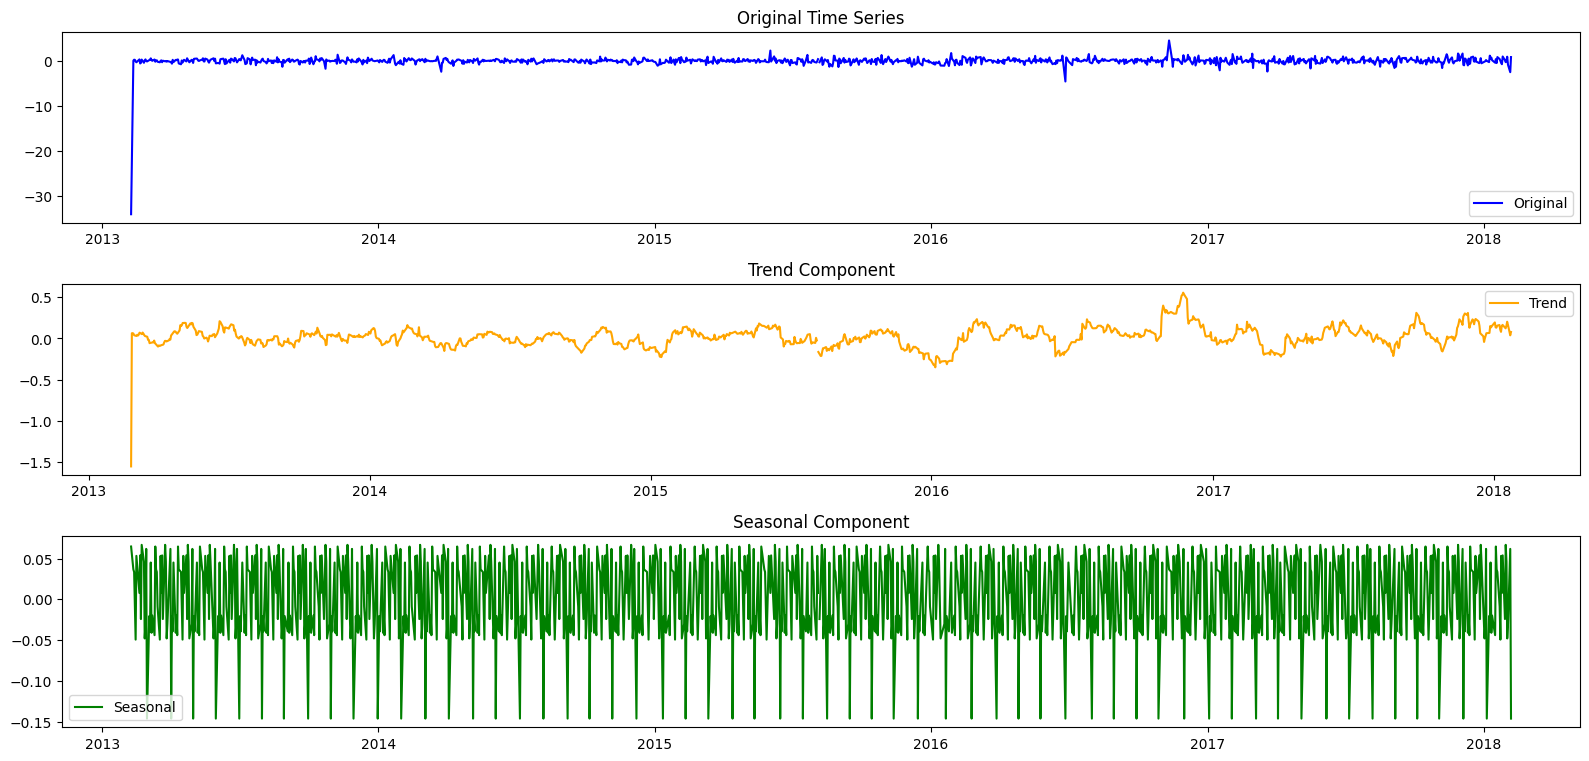

In [ ]:
import matplotlib as mpl

# Set the chunksize to a higher value (e.g., 1000)
mpl.rcParams['agg.path.chunksize'] = 1000

# Decompose the time series
decomposition = seasonal_decompose(zion['close_diff'], model='additive', period=21)  # Monthly data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotting the decomposed components
plt.figure(figsize=(16, 10))

plt.subplot(4, 1, 1)
plt.plot(zion['close_diff'], label='Original', color='blue')
plt.title('Original Time Series')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')
plt.legend()

plt.tight_layout()
plt.show()


## ACF\PACF For Autocorrelation

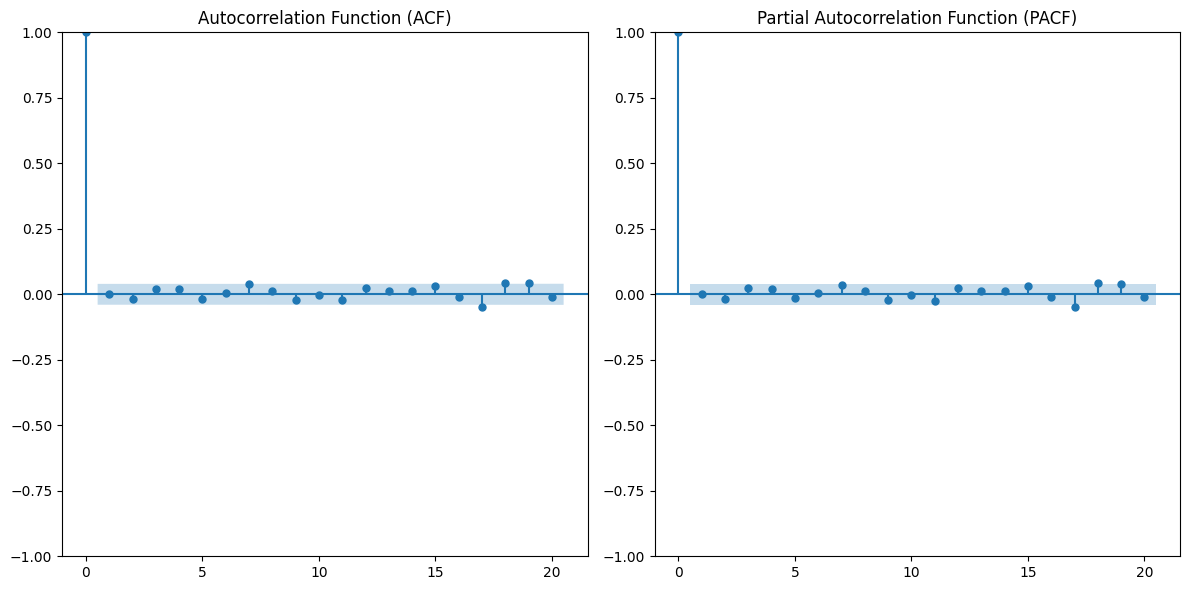

In [ ]:
# Plot ACF
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(stock_subset['close_diff'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(stock_subset['close_diff'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

># The Time Series is __Stationary__

>## Splitting data into training (80%) and test (20%)
### For Zion Company

In [ ]:
zion.shape

(1233, 48)

In [19]:
# Define the split ratio
zion_train_size = int(len(zion) * 0.8)

# Split the data
zion_train_data = zion[:zion_train_size]
zion_test_data = zion[zion_train_size:]

# Display the shapes of the training and testing sets
print(f"Training data shape: {zion_train_data.shape}")
print(f"Testing data shape: {zion_test_data.shape}")


Training data shape: (986, 48)
Testing data shape: (247, 48)


## End Of Section 1:

## __Section 2: _Statistical Forecasting___
### Moving Average Model (Zion)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1619190645.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1619190645.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1619190645.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1619190645.py:28: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  actual.fillna(method='ffill', inplace=True)
C:\Users\len

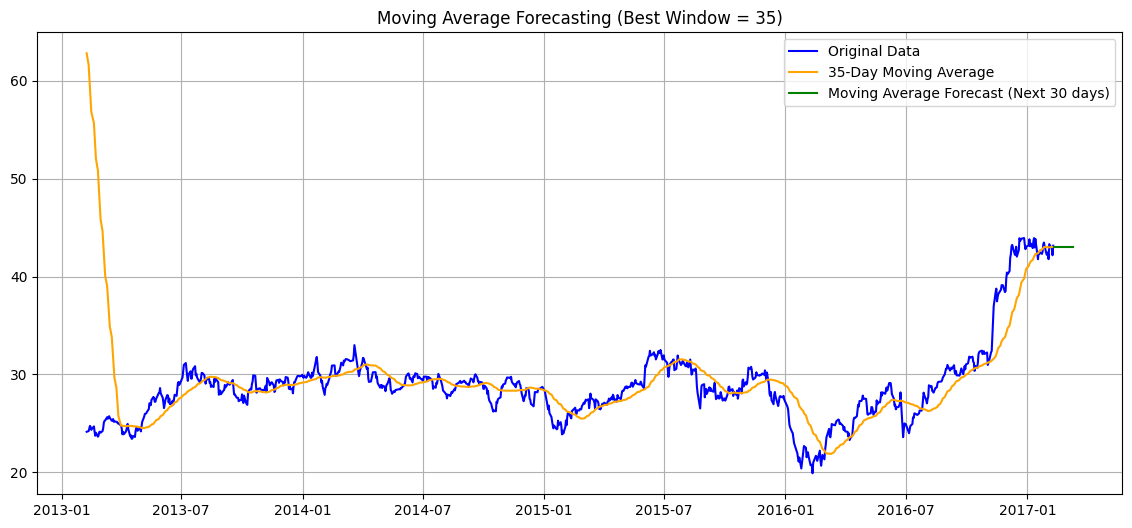

Best Window Size: 35
RMSE: 1.9193
MAE: 1.8243
MAPE: 4.05%


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

best_rmse = float('inf')
best_window = None
best_forecast = None
best_metrics = {}

# Loop through existing rolling mean features
for window in range(15, 51):
    rolling_col = f'Rolling_Mean_{window}'
    if rolling_col not in zion_train_data.columns:
        continue  # skip if the column doesn't exist

    try:
        last_mean = zion_train_data[rolling_col].dropna().iloc[-1]
    except IndexError:
        continue  # skip if not enough data for the current window

    forecast = pd.Series(
        [last_mean] * 30,
        index=pd.date_range(start=zion_train_data.index[-1] + pd.Timedelta(days=1), periods=30)
    )

    actual = zion_test_data['close'].reindex(forecast.index)
    actual.fillna(method='ffill', inplace=True)

    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100

    if rmse < best_rmse:
        best_rmse = rmse
        best_window = window
        best_forecast = forecast
        best_metrics = {'RMSE': rmse, 'MAE': mae, 'MAPE': mape}

# Plot using the best window
best_col = f'Rolling_Mean_{best_window}'

plt.figure(figsize=(14, 6))
plt.plot(zion_train_data['close'], label='Original Data', color='blue')
plt.plot(zion_train_data[best_col], label=f'{best_window}-Day Moving Average', color='orange')
plt.plot(best_forecast, label='Moving Average Forecast (Next 30 days)', color='green')
plt.title(f'Moving Average Forecasting (Best Window = {best_window})')
plt.legend()
plt.grid(True)
plt.show()

# Print best metrics
print(f'Best Window Size: {best_window}')
print(f"RMSE: {best_metrics['RMSE']:.4f}")
print(f"MAE: {best_metrics['MAE']:.4f}")
print(f"MAPE: {best_metrics['MAPE']:.2f}%")


## Exponential Smoothing (Holt-Winters Method) 
>## _Used for long-term forecasts_

c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\lenovo\Desktop\Lorraine's\Time Series 2.2\Exam Project (Easter)\.venv\L

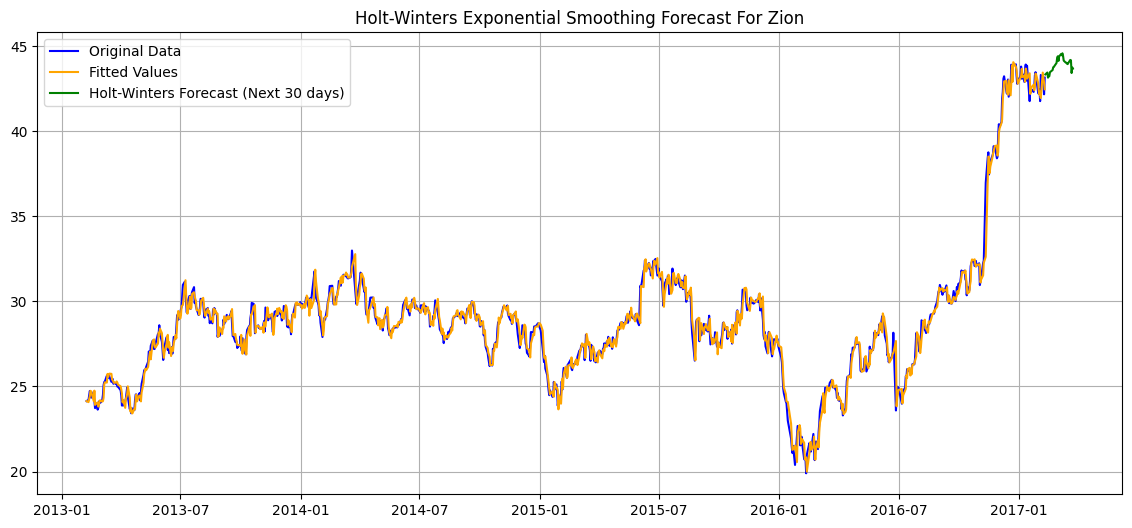

Best Params → Trend: add, Seasonal: mul, Period: 60
RMSE: 1.4629
MAE: 1.2033
MAPE: 2.76%


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ensure datetime index
zion_train_data.index = pd.to_datetime(zion_train_data.index)
zion_test_data.index = pd.to_datetime(zion_test_data.index)

# Parameter grid
trend_options = ['add', 'mul']
seasonal_options = ['add', 'mul']
seasonal_periods_options = [7, 14, 21, 30, 60]

best_score = float('inf')
best_params = None
best_model = None

# Grid search
for trend, seasonal, period in product(trend_options, seasonal_options, seasonal_periods_options):
    try:
        model = ExponentialSmoothing(
            zion_train_data['close'],
            trend=trend,
            seasonal=seasonal,
            seasonal_periods=period
        )
        fit = model.fit()
        forecast = fit.forecast(30)

        # Get actual data to compare
        actual = zion_test_data['close'].iloc[:len(forecast)]

        # Align forecast index to actual
        forecast.index = actual.index

        # Evaluate
        score = np.sqrt(mean_squared_error(actual, forecast))

        if score < best_score:
            best_score = score
            best_params = (trend, seasonal, period)
            best_model = fit
            best_forecast = forecast

    except Exception as e:
        continue  # skip failing combinations

# Use best model
zion_forecast_hw = best_forecast
hw_fit_zion = best_model
actual_30 = zion_test_data['close'].iloc[:len(zion_forecast_hw)]

# Plotting
plt.figure(figsize=(14, 6))
plt.plot(zion_train_data['close'], label='Original Data', color='blue')
plt.plot(hw_fit_zion.fittedvalues, label='Fitted Values', color='orange')
plt.plot(zion_forecast_hw, label='Holt-Winters Forecast (Next 30 days)', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecast For Zion')
plt.legend()
plt.grid(True)
plt.show()

# Metrics
rmse = np.sqrt(mean_squared_error(actual_30, zion_forecast_hw))
mae = mean_absolute_error(actual_30, zion_forecast_hw)
mape = np.mean(np.abs((actual_30 - zion_forecast_hw) / actual_30)) * 100

print(f'Best Params → Trend: {best_params[0]}, Seasonal: {best_params[1]}, Period: {best_params[2]}')
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')


>## ARIMA Model

Best ARIMA(p,d,q) by AIC: (1, 0, 0) (AIC=3169.38)
Best ARIMA(p,d,q) by BIC: (1, 0, 0) (BIC=3184.06)
RMSE: 1.9551
MAE: 1.8575
MAPE: 4.18%


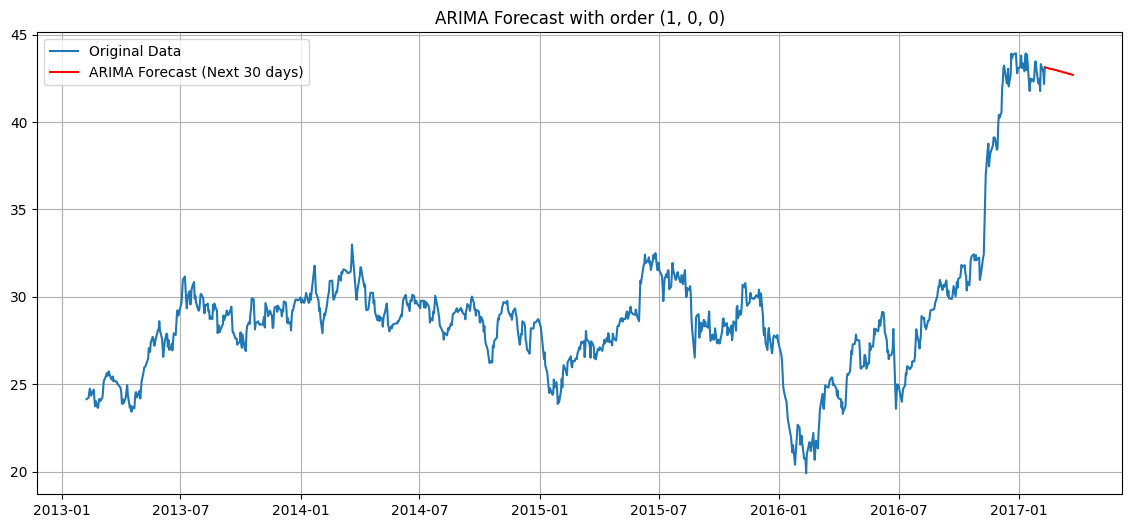

In [22]:
import warnings
import itertools
import statsmodels.api as sm

# Set up parameter grid
p = range(1, 4) 
q = range(0, 3)
d = [0]  # assuming data is already stationary

# Generate all combinations
pdq = list(itertools.product(p, d, q))

# Suppress warnings
warnings.filterwarnings("ignore")

best_aic = float('inf')
best_bic = float('inf')
best_order_aic = None
best_order_bic = None
best_model = None

for order in pdq:
    try:
        model = sm.tsa.ARIMA(zion_train_data['close_diff'], order=order)
        results = model.fit()
        
        if results.aic < best_aic:
            best_aic = results.aic
            best_order_aic = order
            best_model = results
        
        if results.bic < best_bic:
            best_bic = results.bic
            best_order_bic = order
    except:
        continue

print(f'Best ARIMA(p,d,q) by AIC: {best_order_aic} (AIC={best_aic:.2f})')
print(f'Best ARIMA(p,d,q) by BIC: {best_order_bic} (BIC={best_bic:.2f})')

# --- Evaluation Metrics for Best AIC Model ---
# Forecasting next 30 steps
forecast_ar = best_model.forecast(steps=30)

# --- Invert differencing to get original forecast values ---
last_close = zion_train_data['close'].iloc[-1]
forecast_original = forecast_ar.cumsum() + last_close

actual = zion_test_data['close'].iloc[:len(forecast_original)]
forecast_original.index = actual.index

# Compute evaluation metrics
rmse = np.sqrt(mean_squared_error(actual, forecast_original))
mae = mean_absolute_error(actual, forecast_original)
mape = np.mean(np.abs((actual - forecast_original) / actual)) * 100

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# Plot
plt.figure(figsize=(14, 6))
plt.plot(zion_train_data['close'], label='Original Data')
plt.plot(forecast_original.index, forecast_original, label='ARIMA Forecast (Next 30 days)', color='red')
plt.title(f'ARIMA Forecast with order {best_order_aic}')
plt.legend()
plt.grid(True)
plt.show()


## End of Section 2:

## Machine Learning (Random Forest)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
import holidays

# --- 1. Feature Engineering ---
zion_ml = zion.copy()
zion_ml['dayofweek'] = zion_ml.index.dayofweek
zion_ml['month'] = zion_ml.index.month
zion_ml['day'] = zion_ml.index.day
zion_ml['is_weekend'] = zion_ml['dayofweek'] >= 5
zion_ml['is_holiday'] = zion_ml.index.isin(holidays.CountryHoliday('US', years=zion_ml.index.year.unique()))
zion_ml.head(10)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_5376\1549793279.py:12: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  zion_ml['is_holiday'] = zion_ml.index.isin(holidays.CountryHoliday('US', years=zion_ml.index.year.unique()))


open    high      low  close   volume  close_diff  \
date                                                             
2013-02-08  24.03  24.210  23.9500  24.14  2104483      -34.16   
2013-02-11  24.14  24.300  23.9900  24.21  1839686        0.07   
2013-02-12  24.28  24.570  24.1400  24.49  2603143        0.28   
2013-02-13  24.58  24.920  24.4954  24.74  2911880        0.25   
2013-02-14  24.68  24.785  24.5100  24.63  2789414       -0.11   
2013-02-15  24.76  24.780  24.2500  24.34  2070979       -0.29   
2013-02-19  24.44  24.705  24.3800  24.69  2067036        0.35   
2013-02-20  24.64  24.670  24.1300  24.14  1742745       -0.55   
2013-02-21  24.05  24.350  23.5600  23.73  2343575       -0.41   
2013-02-22  23.87  24.050  23.8100  24.04  1274181        0.31   

            Rolling_Mean_15  Rolling_Mean_16  Rolling_Mean_17  \
date                                                            
2013-02-08        58.464000        58.725625        59.132941   
2013-02-11        55.924000        56.323125        56.695294   
2013-02-12        53.426667        53.959375        54.450588   
2013-02-13        51.022667        51.633750        52.240588   
2013-02-14        48.542667        49.373125        50.045294   
2013-02-15        45.978000        47.030000        47.900588   
2013-02-19        43.434667        44.647500        45.715882   
2013-02-20        40.912000        42.228750        43.441176   
2013-02-21        38.400667        39.838125        41.140588   
2013-02-22        35.949333        37.503125        38.908824   

            Rolling_Mean_18  ...  Lag_7  Lag_14  Lag_21  Lag_30  Lag_60  \
date                         ...                                          
2013-02-08        59.502778  ...  61.40   62.31   67.84   65.50   64.51   
2013-02-11        57.192778  ...  60.81   61.95   68.30   65.82   65.56   
2013-02-12        54.906111  ...  60.73   60.80   65.45   66.26   65.58   
2013-02-13        52.800000  ...  60.06   61.83   62.76   66.03   65.80   
2013-02-14        50.706667  ...  58.54   62.81   65.79   66.43   65.39   
2013-02-15        48.617222  ...  58.46   62.84   65.65   65.83   66.60   
2013-02-19        46.611111  ...  58.30   61.98   62.65   67.14   67.18   
2013-02-20        44.517222  ...  24.14   61.40   62.31   66.91   67.55   
2013-02-21        42.346111  ...  24.21   60.81   61.95   66.90   66.43   
2013-02-22        40.190556  ...  24.49   60.73   60.80   67.84   67.01   

            dayofweek  month  day  is_weekend  is_holiday  
date                                                       
2013-02-08          4      2    8       False       False  
2013-02-11          0      2   11       False       False  
2013-02-12          1      2   12       False       False  
2013-02-13          2      2   13       False       False  
2013-02-14          3      2   14       False       False  
2013-02-15          4      2   15       False       False  
2013-02-19          1      2   19       False       False  
2013-02-20          2      2   20       False       False  
2013-02-21          3      2   21       False       False  
2013-02-22          4      2   22       False       False  

[10 rows x 53 columns]

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest RMSE: 3.9595
Random Forest MAE: 2.7355
Random Forest MAPE: 5.65%


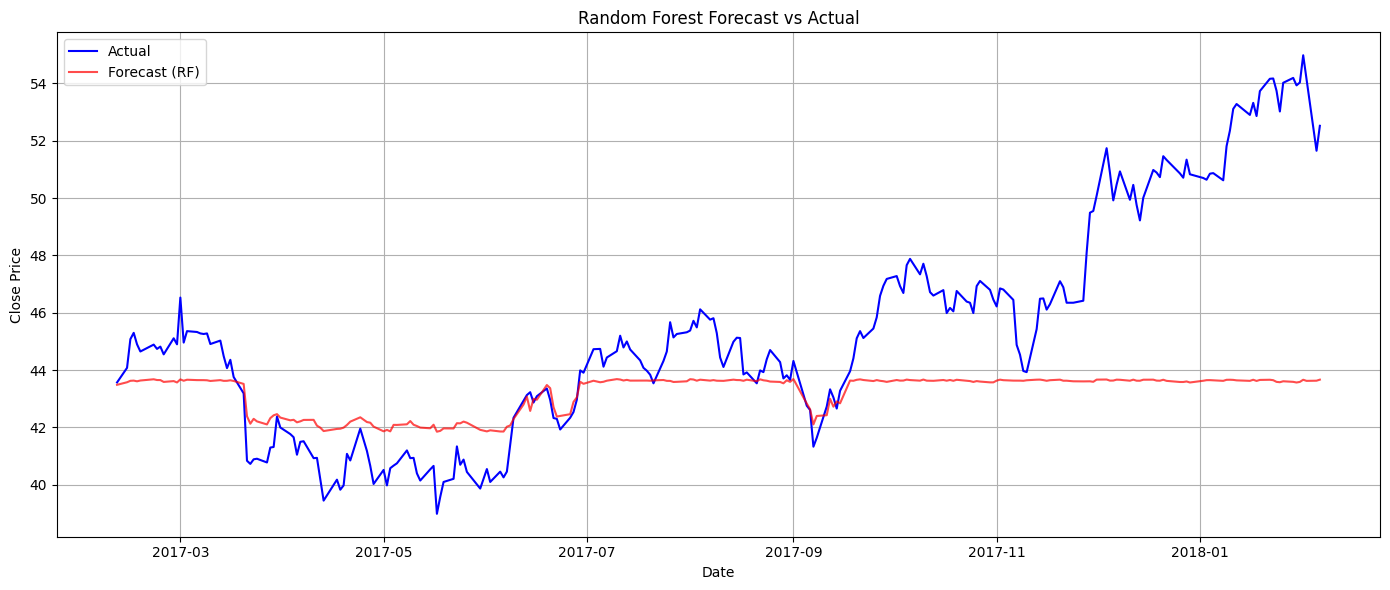

In [ ]:
columns = ['open', 'high', 'low', 'volume', 'close_diff',
       'Rolling_Mean_15', 'Rolling_Mean_16', 'Rolling_Mean_17',
       'Rolling_Mean_18', 'Rolling_Mean_19', 'Rolling_Mean_20',
       'Rolling_Mean_21', 'Rolling_Mean_22', 'Rolling_Mean_23',
       'Rolling_Mean_24', 'Rolling_Mean_25', 'Rolling_Mean_26',
       'Rolling_Mean_27', 'Rolling_Mean_28', 'Rolling_Mean_29',
       'Rolling_Mean_30', 'Rolling_Mean_31', 'Rolling_Mean_32',
       'Rolling_Mean_33', 'Rolling_Mean_34', 'Rolling_Mean_35',
       'Rolling_Mean_36', 'Rolling_Mean_37', 'Rolling_Mean_38',
       'Rolling_Mean_39', 'Rolling_Mean_40', 'Rolling_Mean_41',
       'Rolling_Mean_42', 'Rolling_Mean_43', 'Rolling_Mean_44',
       'Rolling_Mean_45', 'Rolling_Mean_46', 'Rolling_Mean_47',
       'Rolling_Mean_48', 'Rolling_Mean_49', 'Rolling_Mean_50', 'Lag_1',
       'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30', 'Lag_60', 'dayofweek', 'month',
       'day', 'is_weekend', 'is_holiday']
target = 'close'

# Split data
X = zion_ml[columns]
y = zion_ml[target]

# Use time-aware train-test split
split_idx = int(len(X) * 0.8)
X_train_zion, X_test_zion = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_zion, y_test_zion = y.iloc[:split_idx], y.iloc[split_idx:]

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestRegressor(random_state=42)

# Grid search
grid_search = GridSearchCV(rf, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
grid_search.fit(X_train_zion, y_train_zion)

# Best model
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred_rf = best_rf.predict(X_test_zion)
rmse_rf = np.sqrt(mean_squared_error(y_test_zion, y_pred_rf))
mae_rf = mean_absolute_error(y_test_zion, y_pred_rf)
mape_rf = np.mean(np.abs((y_test_zion - y_pred_rf) / y_test_zion)) * 100

# Output metrics
print("Best Hyperparameters:", grid_search.best_params_)
print(f'Random Forest RMSE: {rmse_rf:.4f}')
print(f'Random Forest MAE: {mae_rf:.4f}')
print(f'Random Forest MAPE: {mape_rf:.2f}%')

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_zion.index, y_test_zion, label='Actual', color='blue')
plt.plot(y_test_zion.index, y_pred_rf, label='Forecast (RF)', color='red', alpha=0.7)
plt.title('Random Forest Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## End of Section 3:

## Deep Learning Model (LSTM)

X_train shape: (962, 30, 53)
Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.0550 - val_loss: 0.0371
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0025 - val_loss: 0.0155
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0014 - val_loss: 0.0172
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.0010 - val_loss: 0.0111
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 8.9613e-04 - val_loss: 0.0086
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 7.5282e-04 - val_loss: 0.0103
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 5.0892e-04 - val_loss: 0.0229
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 8.8188e-04 - val_loss: 0.0041
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 6.1844e-04 - val_loss: 0.0076
Epoch 10/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 4.8933e-04 - val_loss: 0.0176
Epoch 11/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.0904e-04 - val_loss: 0.0078
Epoch 

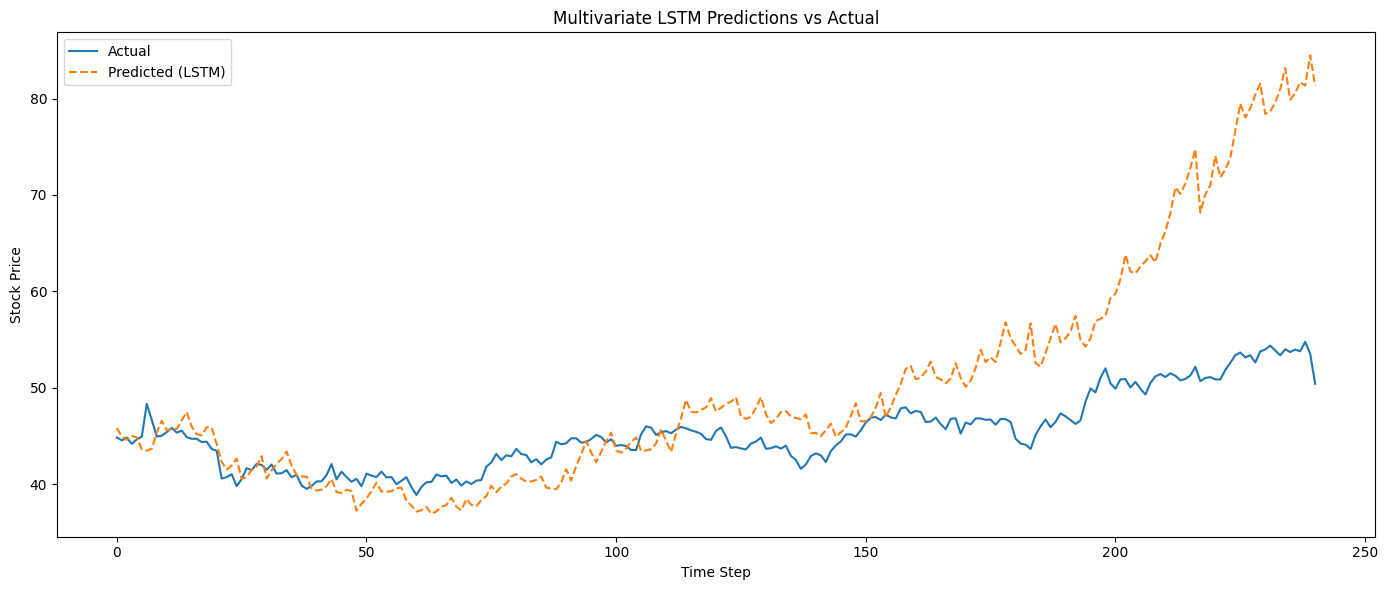

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# --- 1. Preprocessing: Normalize data and create sequences ---

# Select multivariate features
features = ['open', 'high', 'low', 'close', 'volume', 'close_diff',
       'Rolling_Mean_15', 'Rolling_Mean_16', 'Rolling_Mean_17',
       'Rolling_Mean_18', 'Rolling_Mean_19', 'Rolling_Mean_20',
       'Rolling_Mean_21', 'Rolling_Mean_22', 'Rolling_Mean_23',
       'Rolling_Mean_24', 'Rolling_Mean_25', 'Rolling_Mean_26',
       'Rolling_Mean_27', 'Rolling_Mean_28', 'Rolling_Mean_29',
       'Rolling_Mean_30', 'Rolling_Mean_31', 'Rolling_Mean_32',
       'Rolling_Mean_33', 'Rolling_Mean_34', 'Rolling_Mean_35',
       'Rolling_Mean_36', 'Rolling_Mean_37', 'Rolling_Mean_38',
       'Rolling_Mean_39', 'Rolling_Mean_40', 'Rolling_Mean_41',
       'Rolling_Mean_42', 'Rolling_Mean_43', 'Rolling_Mean_44',
       'Rolling_Mean_45', 'Rolling_Mean_46', 'Rolling_Mean_47',
       'Rolling_Mean_48', 'Rolling_Mean_49', 'Rolling_Mean_50', 'Lag_1',
       'Lag_7', 'Lag_14', 'Lag_21', 'Lag_30', 'Lag_60', 'dayofweek', 'month',
       'day', 'is_weekend', 'is_holiday']
dependant = zion_ml[features].copy()

# Normalize
scaler_lst = MinMaxScaler()
scaled_data = scaler_lst.fit_transform(dependant)

# Function to create sequences for multivariate input
def create_multivariate_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])         # All features
        y.append(data[i][0])                    # Only predict 'Global_active_power'
    return np.array(X), np.array(y)

# Create sequences
window_size = 30  # e.g., 30 time steps (days)
X, y = create_multivariate_sequences(scaled_data, window_size)

# Split into train/test
split = int(len(X) * 0.8)
X_train_lst, X_test_lst = X[:split], X[split:]
y_train_lst, y_test_lst = y[:split], y[split:]

print("X_train shape:", X_train_lst.shape)  # Expecting (samples, time_steps, features)

# --- 2. Build and Train LSTM model ---
model_lst = Sequential([
    LSTM(64, activation='relu', input_shape=(X_train_lst.shape[1], X_train_lst.shape[2])),
    Dense(1)
])
model_lst.compile(optimizer='adam', loss='mse')

# Train the model
history = model_lst.fit(X_train_lst, y_train_lst, epochs=20, batch_size=32, validation_split=0.1)

# --- Predict and Invert Scaling ---
y_pred_lst = model_lst.predict(X_test_lst)

# Inverse transform: we need to expand prediction & actuals to match scaler shape
y_test_expanded = np.zeros((len(y_test_lst), scaled_data.shape[1]))
y_pred_expanded = np.zeros((len(y_pred_lst), scaled_data.shape[1]))

y_test_expanded[:, 0] = y_test_lst
y_pred_expanded[:, 0] = y_pred_lst[:, 0]

y_test_inv = scaler_lst.inverse_transform(y_test_expanded)[:, 0]
y_pred_inv = scaler_lst.inverse_transform(y_pred_expanded)[:, 0]

# --- Evaluation ---
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.2f}%')

# --- Visualization ---
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted (LSTM)', linestyle='--')
plt.title('Multivariate LSTM Predictions vs Actual')
plt.xlabel('Time Step')
plt.ylabel('Stock Price')
plt.legend()
plt.tight_layout()
plt.show()


## End of Section 4:

>## Saving the best model and dataset with its scaler

In [23]:
# Saving the data, model and scaler
import joblib


joblib.dump(best_model, "best_model_stock.pkl")

stock_subset.reset_index().to_csv("stock_new.csv", index=False)



# __Analysis & Critical Thinking Questions__

## _Section 1:_ 

>### 1. Why is stationarity important in time series forecasting. Explain the impact of non-stationary data on ARIMA models. 
+ ### Stationarity ensures consistent statistical properties over time, allowing models like ARIMA to make accurate and reliable forecasts. 
+ ### Non-stationary data leads to poor model fit, unreliable forecasts, and invalid statistical inferences due to changing trends or variance.

>### 2. Based on your visualizations, does seasonality appear to be a major factor in either dataset? Justify your answer with observations from your analysis.
+ ### Yes, seasonality appears to be a major factor in either dataset. The visualizations show repeating patterns over consistent intervals where the values tend to rise and fall at regular intervals. Additionally, rolling averages and decomposition plots showed repeated cycles, especially around similar time periods, indicating strong seasonal influence in the data.
![Seasonality For Household Power Consumption](Trend_seasonality_energy.png)
![Seasonality For Stock Prices](Trend_seasonality_stock.png)

 ## Section 2:
>### 1. Compare and contrast ARIMA and Exponential Smoothing. When would you prefer one over the other? Provide a real-world example.
### __Household Power Consumption__
 | Feature                   | ARIMA                                      | Exponential Smoothing (Holt-Winters)       |
|---------------------------|---------------------------------------------|---------------------------------------------|
| Assumes Stationarity      | Yes (ARIMA requires stationary data)        | No (handles trend and seasonality directly) |
| Seasonality Handling      | Not directly (SARIMA is needed)             | Built-in (best seasonal period: 21 days)    |
| Best Model Parameters     | (1, 0, 1)                                   | Trend: mul, Seasonal: add, Period: 21       |
| RMSE                      | 0.1743                                      | 0.1908                                       |
| MAE                       | 0.1214                                      | 0.1424                                       |
| MAPE                      | 14.24%                                      | 16.51%                                       |
| Preferred When            | Data is stationary with low seasonality     | Clear seasonal patterns in the data         |
| Real-World Example        | Forecasting energy consumption in stable trends | Retail sales or electricity with weekly cycles |
### __Stock Prices__
| Feature                   | ARIMA                                      | Exponential Smoothing (Holt-Winters)         |
|---------------------------|---------------------------------------------|-----------------------------------------------|
| Seasonality Handling      | Not directly (SARIMA is needed)             | Built-in (best seasonal period: 60 days)      |
| Best Model Parameters     | (1, 0, 0)                                   | Trend: add, Seasonal: mul, Period: 60         |
| RMSE                      | 1.9551                                      | 1.4629                                        |
| MAE                       | 1.8575                                      | 1.2033                                        |
| MAPE                      | 4.18%                                       | 2.76%                                         |
>### 2. Look at your ARIMA predictions—how well do they match observed trends? If there is a large error, what do you think caused it, and how could you improve the model?
### __For Household Power Consumption__
+ ### The ARIMA predictions match the observed trends reasonably well, as shown by a low RMSE (0.1743), MAE (0.1214), and MAPE (14.24%). These metrics indicate a solid fit with relatively small prediction errors. 
### __For Stock Prices__
+ ### The ARIMA predictions show a moderate match with the observed trends, as indicated by RMSE (1.9551), MAE (1.8575), and MAPE (4.18%). While the performance is acceptable, it is noticeably less accurate than the Exponential Smoothing model.
### However, if there is any deviation, it could be due to ARIMA’s limitation in modeling seasonal patterns. To improve the model, I could try using SARIMA to incorporate seasonality explicitly or explore hybrid models like ARIMA with machine learning for capturing more complex patterns.

## Section 3:
>### 1. What advantages does machine learning have over ARIMA in time series forecasting? What are some limitations? 
| **Aspect**            | **Machine Learning**                                     | **ARIMA**                                                   |
|-----------------------|----------------------------------------------------------|-------------------------------------------------------------|
| Pattern Handling      | Captures complex, non-linear patterns                    | Best with linear, stationary patterns                       |
| Feature Usage         | Can use multiple exogenous features                      | Primarily univariate                                        |
| Assumptions           | No strict assumptions (e.g., stationarity not required)  | Requires data to be stationary                              |
| Interpretability      | Less interpretable                                       | More interpretable, clear statistical framework             |
| Data Requirements     | Requires large datasets and careful preprocessing        | Works well with smaller, structured datasets                |
| Risk of Overfitting   | Higher without proper tuning                             | Lower if assumptions are met                                |

>### 2. Based on your results, which model (ML vs ARIMA) performed better? Why do you think that is? 
### __For Household Power Consumption__
| **Metric**      | **Random Forest (ML)** | **ARIMA**     |
|-----------------|------------------------|---------------|
| RMSE            | 0.0107                 | 0.1743        |
| MAE             | 0.0086                 | 0.1214        |
| MAPE            | 0.96%                  | 14.24%        |
| Best Params     | See below              | (1, 0, 1)     |
|                 | max_depth=10           |               |
|                 | n_estimators=150       |               |
|                 | min_samples_split=2    |               |
|                 | min_samples_leaf=1     |               |

+ ### Based on the results, the Random Forest model outperformed ARIMA by a significant margin across all evaluation metrics (RMSE, MAE, MAPE). This is likely because ML models like Random Forest can capture complex, non-linear relationships and leverage additional engineered features, whereas ARIMA relies solely on past values and assumes linearity and stationarity.
### __For Stock Prices__

| **Metric**      | **Random Forest (ML)** | **ARIMA**     |
|-----------------|------------------------|---------------|
| RMSE            | 3.9595                 | 1.9551        |
| MAE             | 2.7355                 | 1.8575        |
| MAPE            | 5.65%                  | 4.18%         |
| Best Params     | See below              | (1, 0, 0)     |
|                 | max_depth=10           |               |
|                 | n_estimators=50        |               |
|                 | min_samples_split=2    |               |
|                 | min_samples_leaf=1     |               |

+ ### In this case, ARIMA outperformed the Random Forest model across all metrics (lower RMSE, MAE, and MAPE). This suggests that ARIMA was better suited to the structure of this particular dataset, likely due to its ability to model the linear, autoregressive nature of the series. The Random Forest model may have struggled due to overfitting or insufficient feature engineering for this dataset.


## __Section 4:__

>### 1. What is the key advantage of using LSTMs for time series forecasting? How does it handle long-term dependencies compared to traditional models? 
| Feature                       | LSTM                                                                 |
|------------------------------|----------------------------------------------------------------------|
| Key Advantage                | Captures long-term dependencies using memory cells and gating       |
| Long-Term Dependency Handling| Maintains context across time steps more effectively                |
| Compared to Traditional Models | Handles non-linear, sequential patterns better than ARIMA/ML       |

>### 2. Examine your deep learning model’s performance—how does it compare to ML and ARIMA? Did it generalize well, or does it show signs of overfitting?
### __For Household Power Consumption__
| **Model**       | **RMSE**   | **MAE**    | **MAPE**   | **Generalization / Overfitting**                              |
|-------------|--------|--------|--------|------------------------------------------------------------|
| ARIMA       | 0.1743 | 0.1214 | 14.24% | Generalized well; performed better than Exponential Smoothing |
| Random Forest | 0.0107 | 0.0086 | 0.96%  | Generalized very well; best performer overall               |
| LSTM        | 0.1942 | 0.1500 | 16.87% | Shows signs of overfitting; higher error despite training improvements |
+ ## **Best Model:** Random Forest

### __For Stock Prices__
| **Model**       | **RMSE** | **MAE**  | **MAPE** | **Generalization / Overfitting**                                                |
|-----------------|----------|----------|----------|----------------------------------------------------------------------------------|
| ARIMA           | 1.9551   | 1.8575   | 4.18%    | Performed relatively well; moderate forecasting accuracy with linear assumptions |
| Random Forest   | 3.9595   | 2.7355   | 5.65%    | Moderate performance; some error possibly due to lack of temporal dynamics      |
| **LSTM**        | 9.6349   | 6.0114   | 12.29%   | **Struggled to generalize**; significant gap between training and test performance, suggesting overfitting |

+ **Conclusion**: Although LSTMs are designed to capture complex temporal dependencies, in this case, the deep learning model underperformed compared to both ARIMA and Random Forest. The higher error metrics (RMSE, MAE, and MAPE) indicate that the LSTM may have overfit to the training data and failed to generalize well on unseen data—possibly due to limited data, insufficient regularization, or suboptimal hyperparameters.
+ ## **Best Model:** ARIMA

## __Section 5:__
>### 1. Imagine your energy demand forecast is used by a power company. What business decisions could be influenced by your predictions? 

Using an accurate forecasting model like **Random Forest**, a power company can make informed decisions such as:

- **Power Generation Planning**: Schedule generators efficiently to meet predicted demand, reducing energy waste and cost.
- **Grid Load Management**: Distribute power more effectively, avoiding overloading and minimizing outages.
- **Dynamic Pricing Strategies**: Adjust electricity rates based on forecasted demand, promoting energy use during off-peak hours.
- **Maintenance Scheduling**: Plan equipment servicing during low-demand periods to minimize impact.
- **Energy Policy and Consumer Programs**: Use trends to support targeted energy-saving initiatives and public awareness campaigns.

>### 2. If you were to deploy your forecasting model for real-time use, what additional steps would you take to ensure robustness and reliability? 

To ensure the model operates effectively in a live environment:

- **Real-Time Data Integration**: Use platforms like Kafka or AWS Kinesis to stream consumption data into the model continuously.
- **Monitoring and Alerting**: Set up dashboards and automated alerts to track performance metrics and detect anomalies.
- **Fallback Systems**: Prepare simpler backup models or rules for times when the primary model fails or underperforms.
- **Automated Model Retraining**: Update the model periodically (e.g., weekly or monthly) with new data to adapt to evolving patterns.
- **Anomaly Detection Module**: Include tools to flag unexpected demand spikes due to events like outages or weather changes.
- **Scalable Cloud Deployment**: Host the solution on cloud infrastructure to handle variable data loads and ensure uptime.